# Probability of Perfect Fairness

plotting only - calculations are in `metricCalculation.ipynb` file

probability of achieving perfect fairness (in different metrics), according to different metrics, for given group/imbalance ratio

- as function of group ratio
- as function of imbalance ratio

In [1]:
import os
import warnings
from os import path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# from plotnine import *

warnings.filterwarnings('ignore')

In [2]:
sample_size = 56        # 24
calculations_dir = path.join('out', 'calculations', f'n{sample_size}')
plots_dir = path.join('out', 'plots', f'n{sample_size}')
os.makedirs(plots_dir, exist_ok=True)

epsilons = [0, .01, .02]
ratio_types = ['gr', 'ir']

# df_ir = pd.read_csv(path.join(calculations_dir, 'ppf_ir_eps0.csv'))
# df_gr = pd.read_csv(path.join(calculations_dir, 'ppf_gr_eps0.csv'))

dfs = {(ratio_type, epsilon): pd.read_csv(path.join(calculations_dir, f'ppf_{ratio_type}_eps{epsilon}.csv'))
       for ratio_type in ratio_types
       for epsilon in epsilons}

diff_metrics_styles = {
    'Accuracy equality difference': {'color': 'red', 'marker': '*'},
    'Equal opportunity difference': {'color': 'green', 'marker': 'v'},
    'Predictive equality difference': {'color': 'blue', 'marker': 'x'},
    'Negative predictive parity difference': {'color': 'orange', 'marker': '+'},
    'Positive predictive parity difference': {'color': 'purple', 'marker': 'o'},
    'Statistical parity': {'color': 'black', 'marker': '.'},
}

In [3]:
def melt_df(df, base_metric):
    temp = df.pop(base_metric)
    length = len(df.columns)
    df = pd.melt(df)
    df[base_metric] = list(temp) * length
    return df

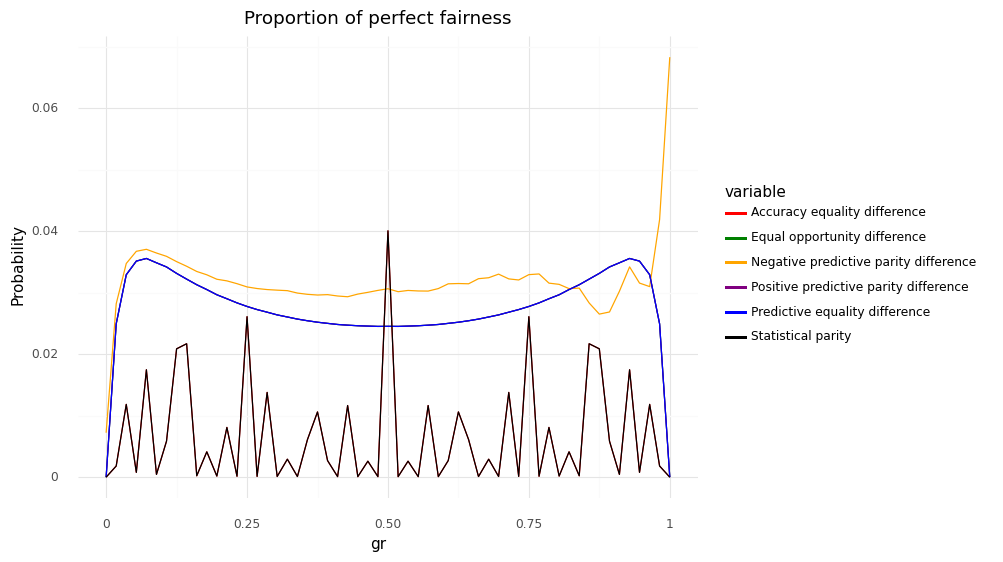

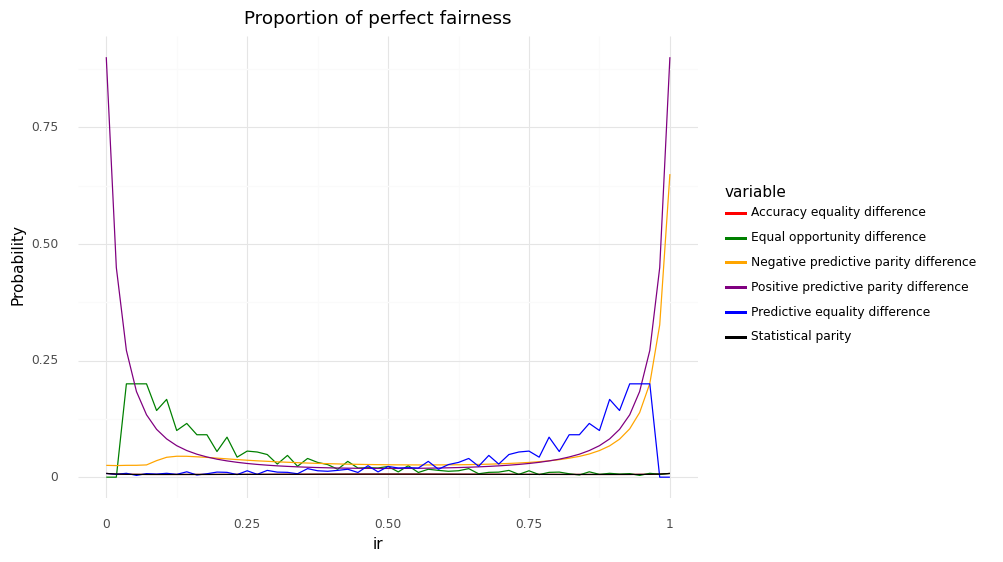

In [14]:
# def plot_ppf(df, base_metric):
#     fig = ggplot(df, aes(x=base_metric, y='value', color='variable'))
#     fig += geom_line()
#     fig += scale_color_manual(values=color_mapping)
#     fig += theme_minimal()
#     fig += theme(figure_size=(8, 6))
#     fig += ylab('Probability')
#     fig += ggtitle('Proportion of perfect fairness')
#
#     print(fig)
#     return fig
#
# for metric in ['gr', 'ir']:
#     fig = plot_ppf(melt_df(dfs[metric].copy(), metric), metric)
#     fig.save(path.join(plots_dir, f'ppf_{metric}_1.png'),
#              width=8, height=6, dpi=300)

## Matplotlib attempt

In [11]:
def plot_mlp(df, base_metric, color_mapping, title='Proportion of perfect fairness', y_max=None):
    fig, ax = plt.subplots(figsize=(8, 6))
    for col in color_mapping.keys():
        # if col == base_metric:
        #     continue
        ax.plot(df[base_metric], df[col], label=col, alpha=.5, **color_mapping[col])

    if y_max is not None:
        ax.set_ylim(0, y_max)

    ax.set_xlabel(base_metric.upper())
    ax.set_ylabel('Probability')
    ax.set_title(title)
    ax.legend()
    plt.show()
    return fig

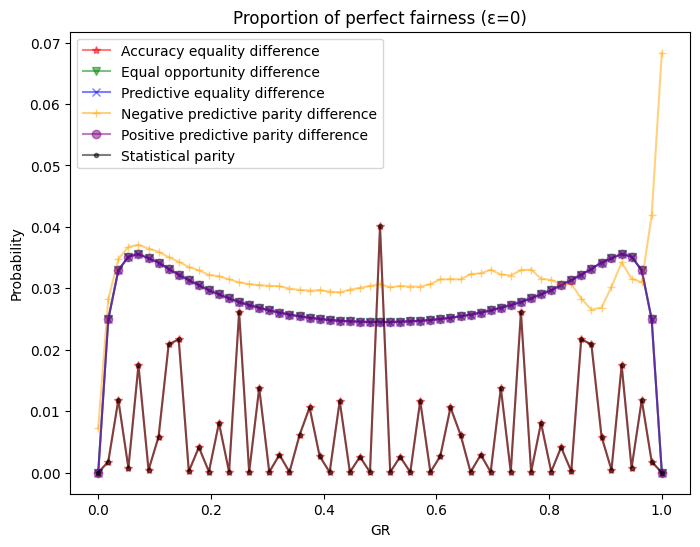

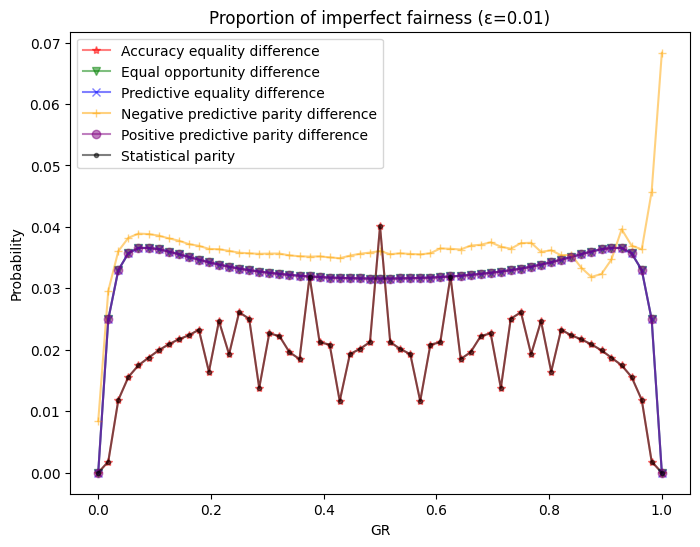

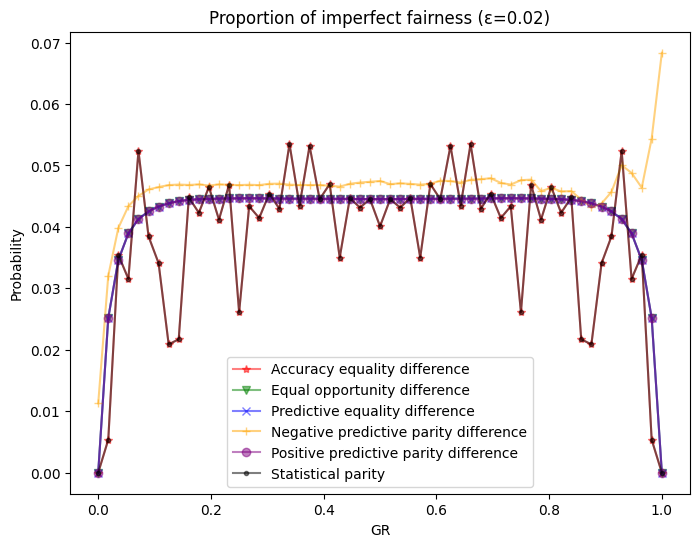

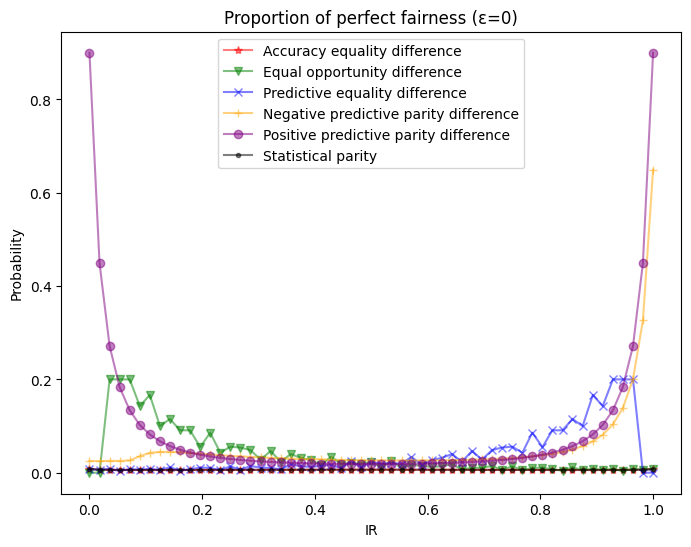

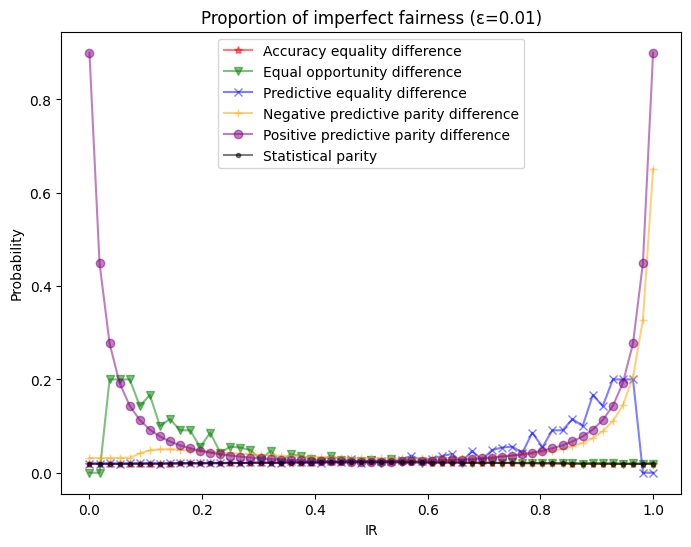

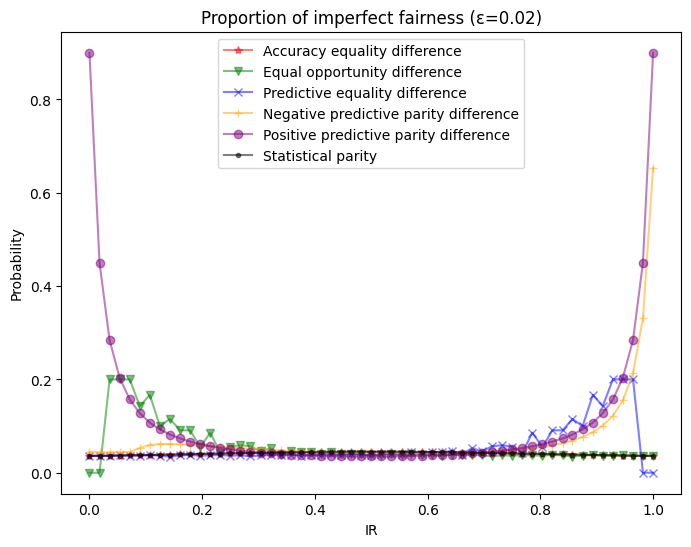

In [19]:
for ratio_type in ratio_types:
    for eps in epsilons:
        fig = plot_mlp(dfs[(ratio_type, eps)], ratio_type, diff_metrics_styles,
                       title=f'Proportion of {"im" if eps != 0 else ""}perfect fairness (ε={eps})')
        fig.savefig(path.join(plots_dir, f'ppf_basic_{ratio_type}_eps{eps}.png'),
                    dpi=300)

## Close-ups for imbalance ratio

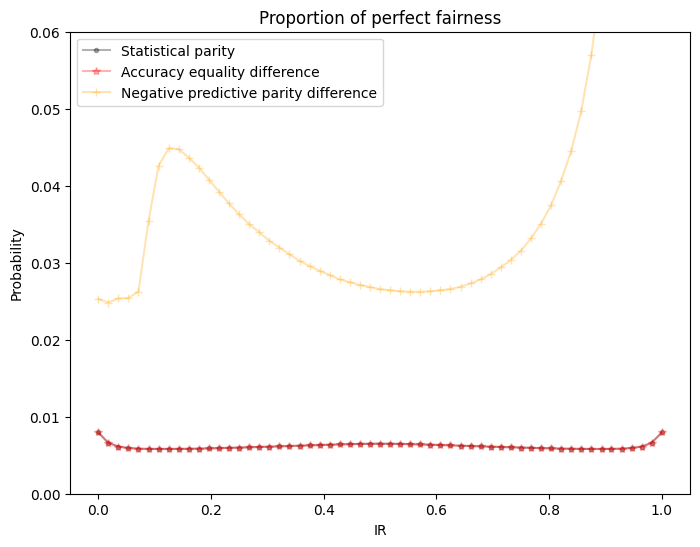

In [13]:
base_metric = 'ir'
df = dfs[(base_metric, 0)]

fig, ax = plt.subplots(figsize=(8, 6))
for col in ['Statistical parity', 'Accuracy equality difference', 'Negative predictive parity difference']:
    ax.plot(df[base_metric], df[col], label=col,
            alpha=.3, **diff_metrics_styles[col])
ax.set_ylim(0, .06)
# ax.set_ylim(0, .01)
ax.set_xlabel(base_metric.upper())
ax.set_ylabel('Probability')
ax.set_title('Proportion of perfect fairness')
ax.legend()
plt.show()

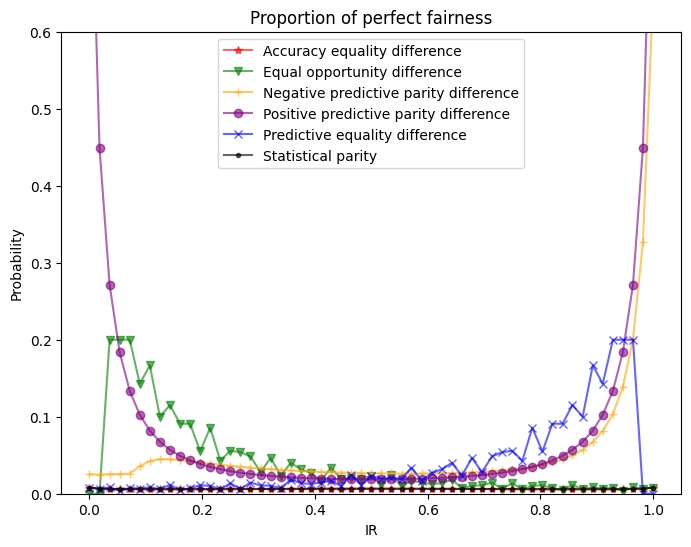

In [14]:
base_metric = 'ir'
df = dfs[(base_metric, 0)]

fig, ax = plt.subplots(figsize=(8, 6))
for col in df.columns:
    if col == base_metric:
        continue
    ax.plot(df[base_metric], df[col], label=col, alpha=.6, **diff_metrics_styles[col])
ax.set_ylim(0, .6)
ax.set_xlabel(base_metric.upper())
ax.set_ylabel('Probability')
ax.set_title('Proportion of perfect fairness')
ax.legend()
plt.show()

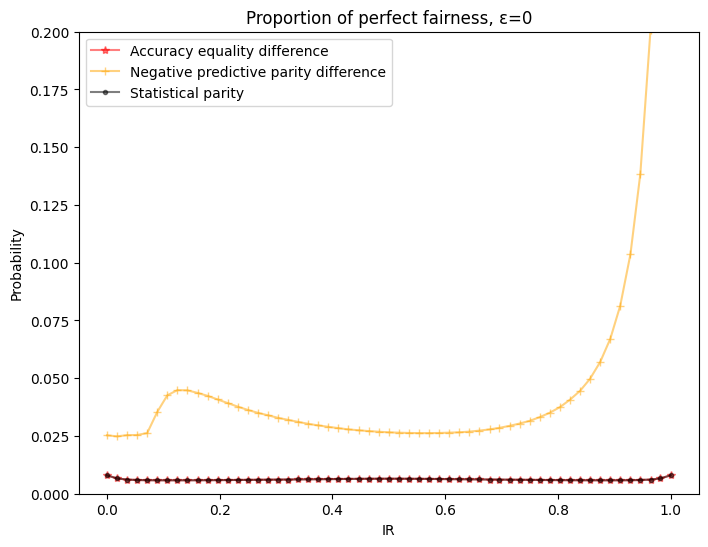

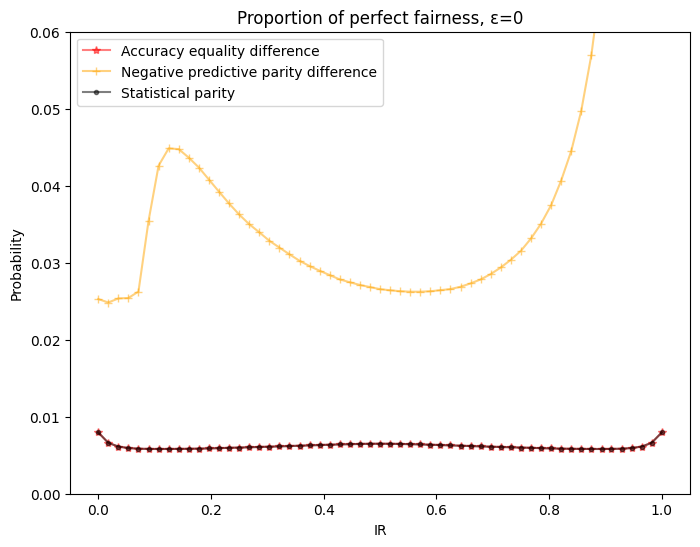

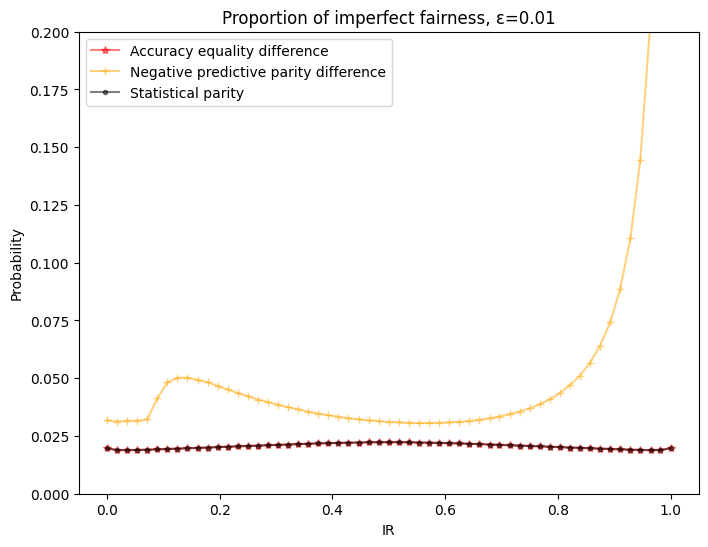

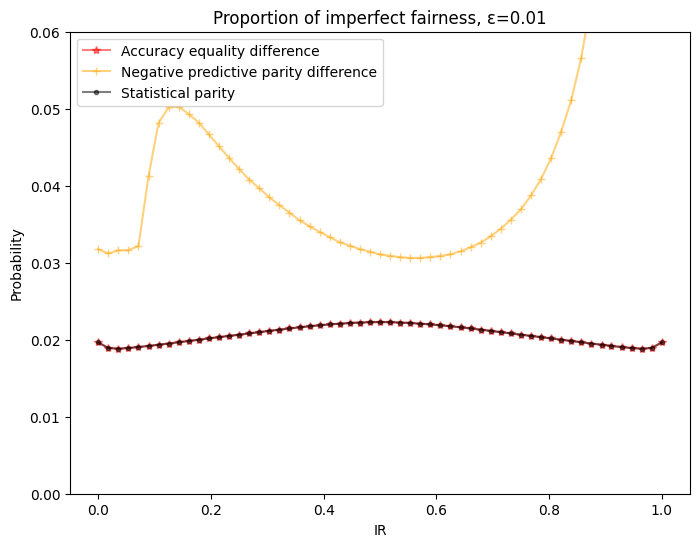

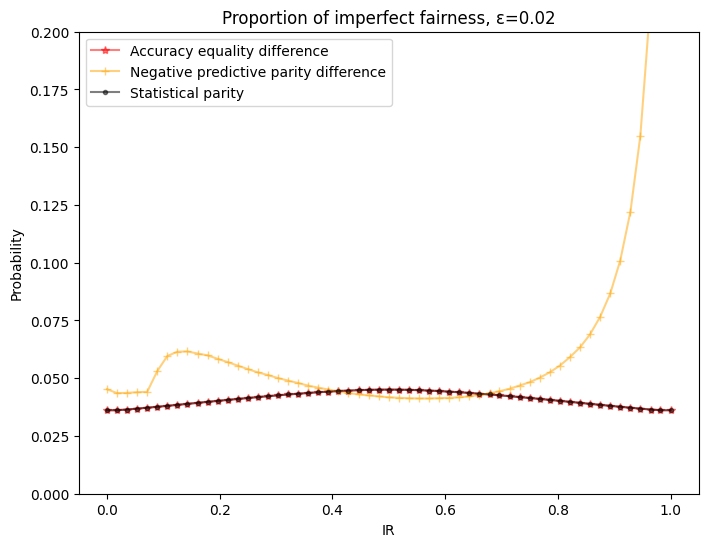

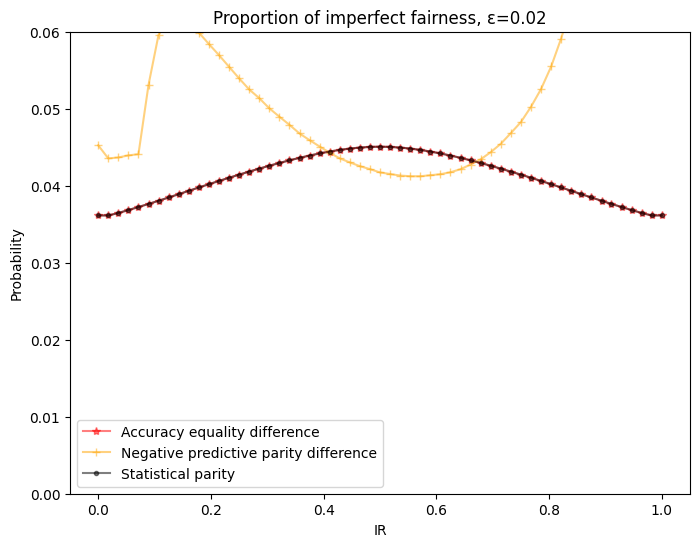

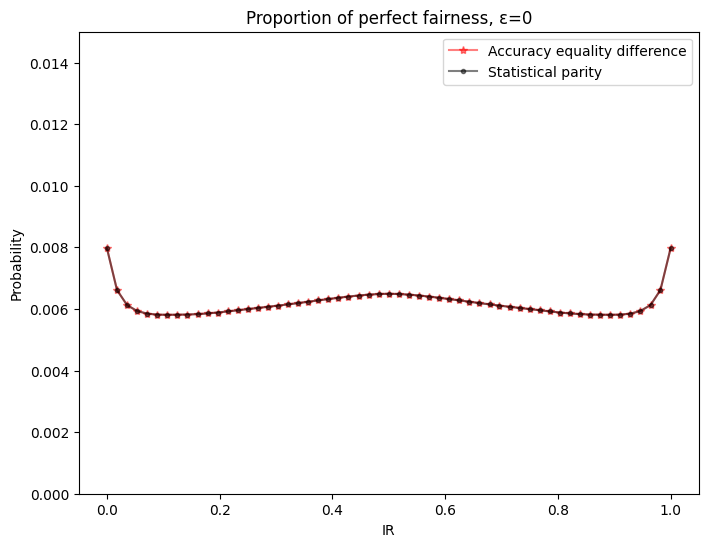

In [23]:
ratio_type = 'ir'
selected_metrics = {
    'Accuracy equality difference': {'color': 'red', 'marker': '*'},
    # 'Equal opportunity difference': {'color': 'green', 'marker': 'v'},
    # 'Predictive equality difference': {'color': 'blue', 'marker': 'x'},
    'Negative predictive parity difference': {'color': 'orange', 'marker': '+'},
    # 'Positive predictive parity difference': {'color': 'purple', 'marker': 'o'},
    'Statistical parity': {'color': 'black', 'marker': '.'},
}

for eps in epsilons:
    for y_max in [.2, .06]:
        fig = plot_mlp(dfs[(ratio_type, eps)], ratio_type, selected_metrics,
                       title=f'Proportion of {"im" if eps != 0 else ""}perfect fairness, ε={eps}', y_max=y_max)
        fig.savefig(path.join(plots_dir, f'ppf_scaled_{ratio_type}_eps{eps}_y{y_max}.png'),
                    dpi=300)

# eps=0 has some values so small that it benefits from another close-up
eps, y_max = 0, .015
del selected_metrics['Negative predictive parity difference']
fig = plot_mlp(dfs[(ratio_type, eps)], ratio_type, selected_metrics,
               title=f'Proportion of {"im" if eps != 0 else ""}perfect fairness, ε={eps}', y_max=y_max)
fig.savefig(path.join(plots_dir, f'ppf_scaled_{ratio_type}_eps{eps}_y{y_max}.png'),
            dpi=300)

### smoothing the statistical parity curve (for different GR)
attempt 1 - grouping 2 results together

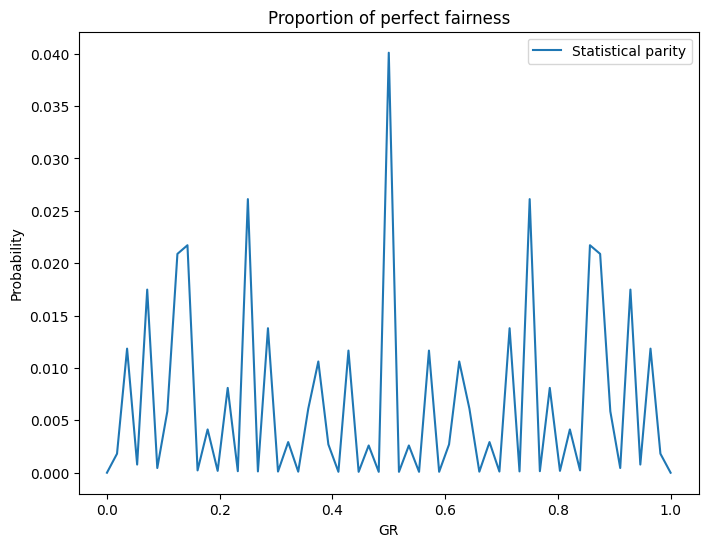

In [8]:
base_metric = 'gr'
x = np.array(dfs[base_metric][base_metric])
y = np.array(dfs[base_metric]['Statistical parity'])

fig, ax = plt.subplots(figsize=(8, 6))
# for col in df.columns:
#     if col == base_metric:
#         continue
#     ax.plot(df[base_metric], df[col], label=col)
ax.plot(x, y, label='Statistical parity')
ax.set_xlabel(base_metric.upper())
ax.set_ylabel('Probability')
ax.set_title('Proportion of perfect fairness')
ax.legend()
plt.show()

Smoothed by averaging 2 adjacent results together


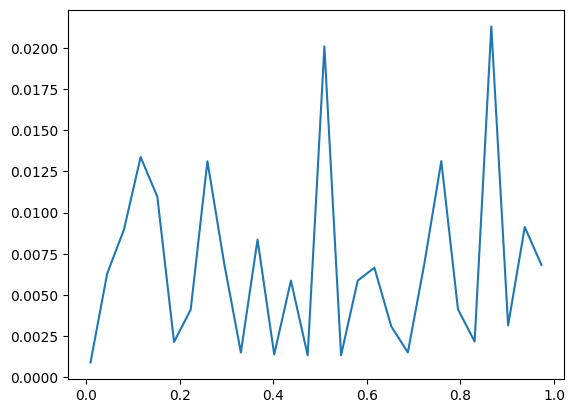

In [27]:
print('Smoothed by averaging 2 adjacent results together')

xx = (x[:-1][::2] + x[1::2]) / 2
yy = (y[:-1][::2] + y[1::2]) / 2

plt.plot(xx, yy)
plt.show()

Distribution of all and averaged results


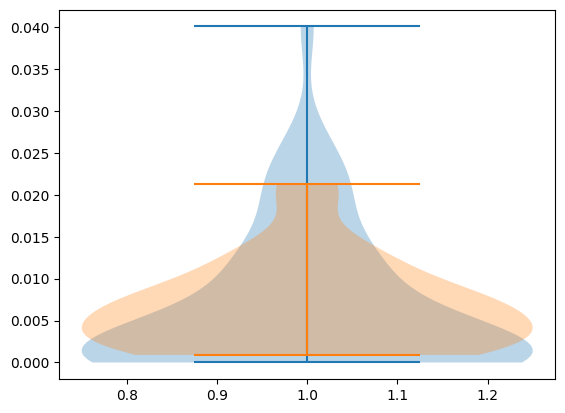

In [28]:
print('Distribution of all and averaged results')

plt.violinplot(y)
plt.violinplot(yy)
plt.show()

Odd and even groups plotted separately


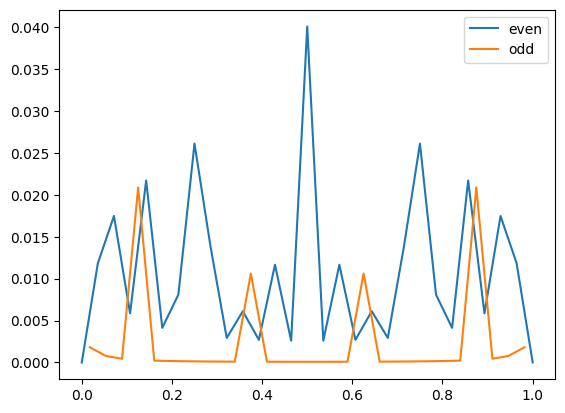

In [9]:
print('Odd and even groups plotted separately')

plt.plot(x[::2], y[::2], label='even')
plt.plot(x[1::2], y[1::2], label='odd')
plt.legend()
plt.show()

## Separate axes

In [25]:
def separate_axis(df, base_metric, color_mapping, eps=0):
    fig, ax = plt.subplots(3, 2, figsize=(12, 12))
    fig.suptitle(f'Proportion of {"perfect" if eps == 0 else "imperfect"} fairness as a function of {base_metric.upper()} (ε={eps})')

    for i, metric in enumerate(color_mapping.keys()):
        ax[i // 2, i % 2].plot(df[base_metric], df[metric], label=metric, **color_mapping[metric])
        # ax[i // 2, i % 2].set_xlabel(base_metric.upper())
        ax[i // 2, i % 2].set_ylabel('Probability')
        ax[i // 2, i % 2].set_title(metric)
        # ax[i // 2, i % 2].legend()

    fig.tight_layout()
    plt.show()
    return fig

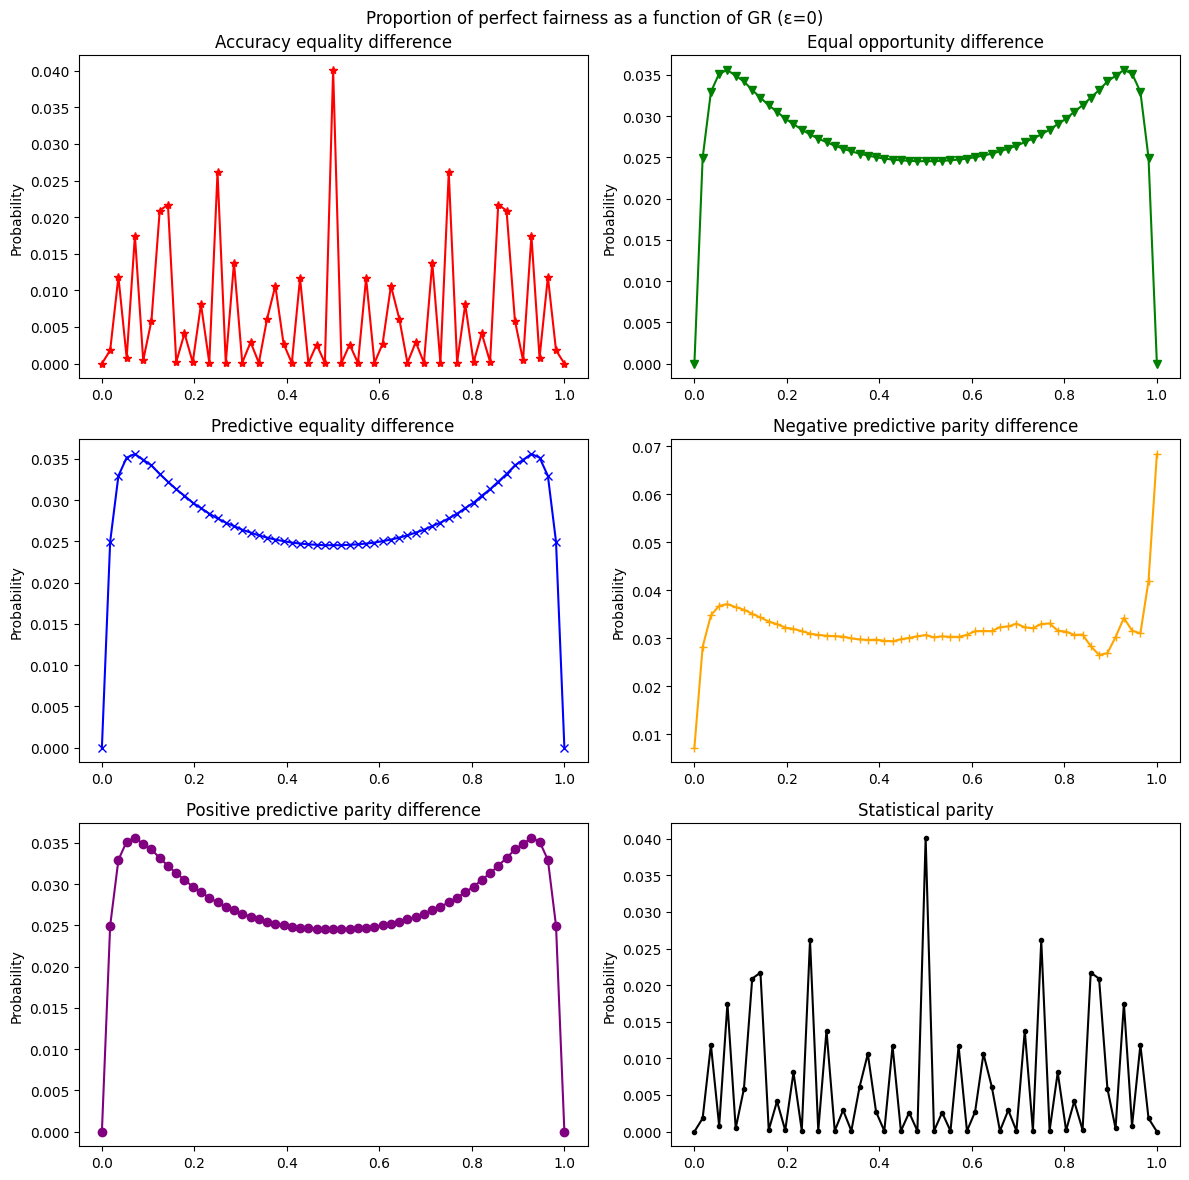

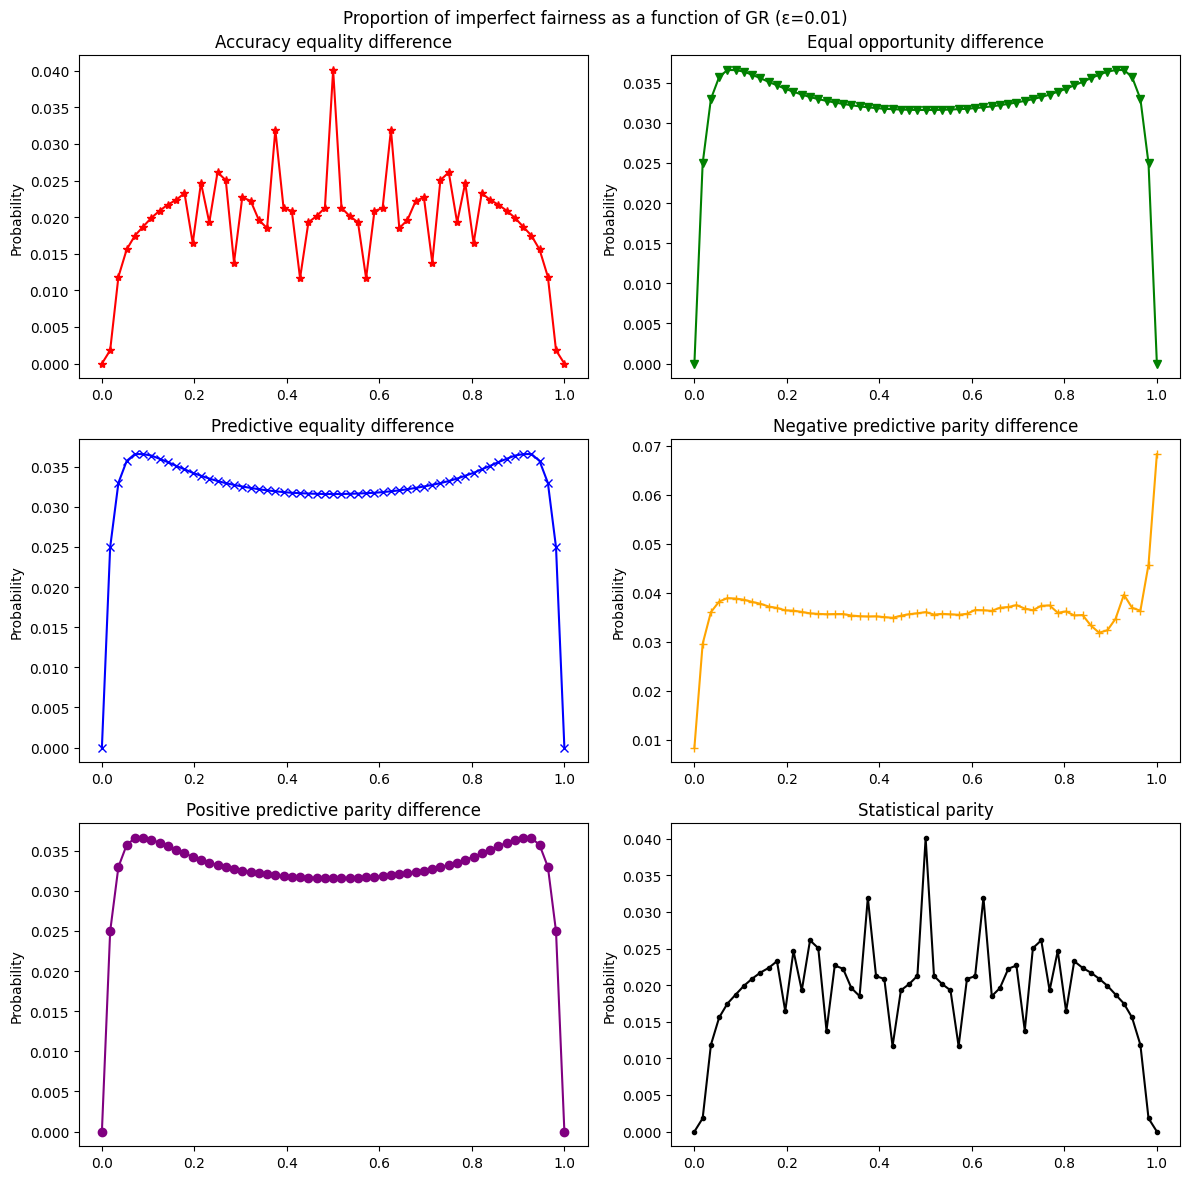

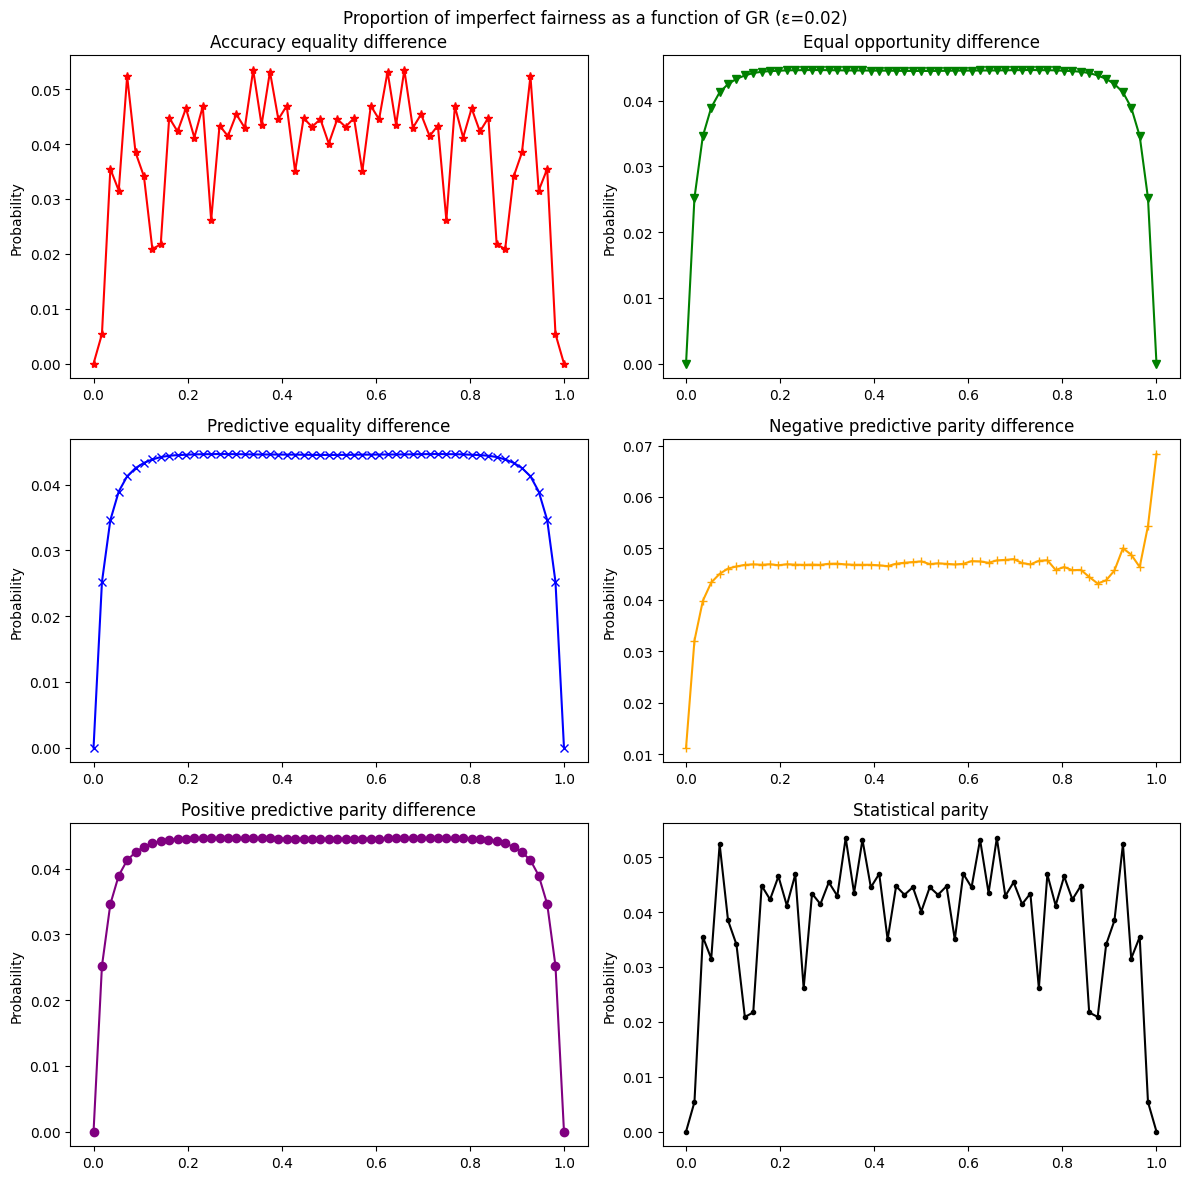

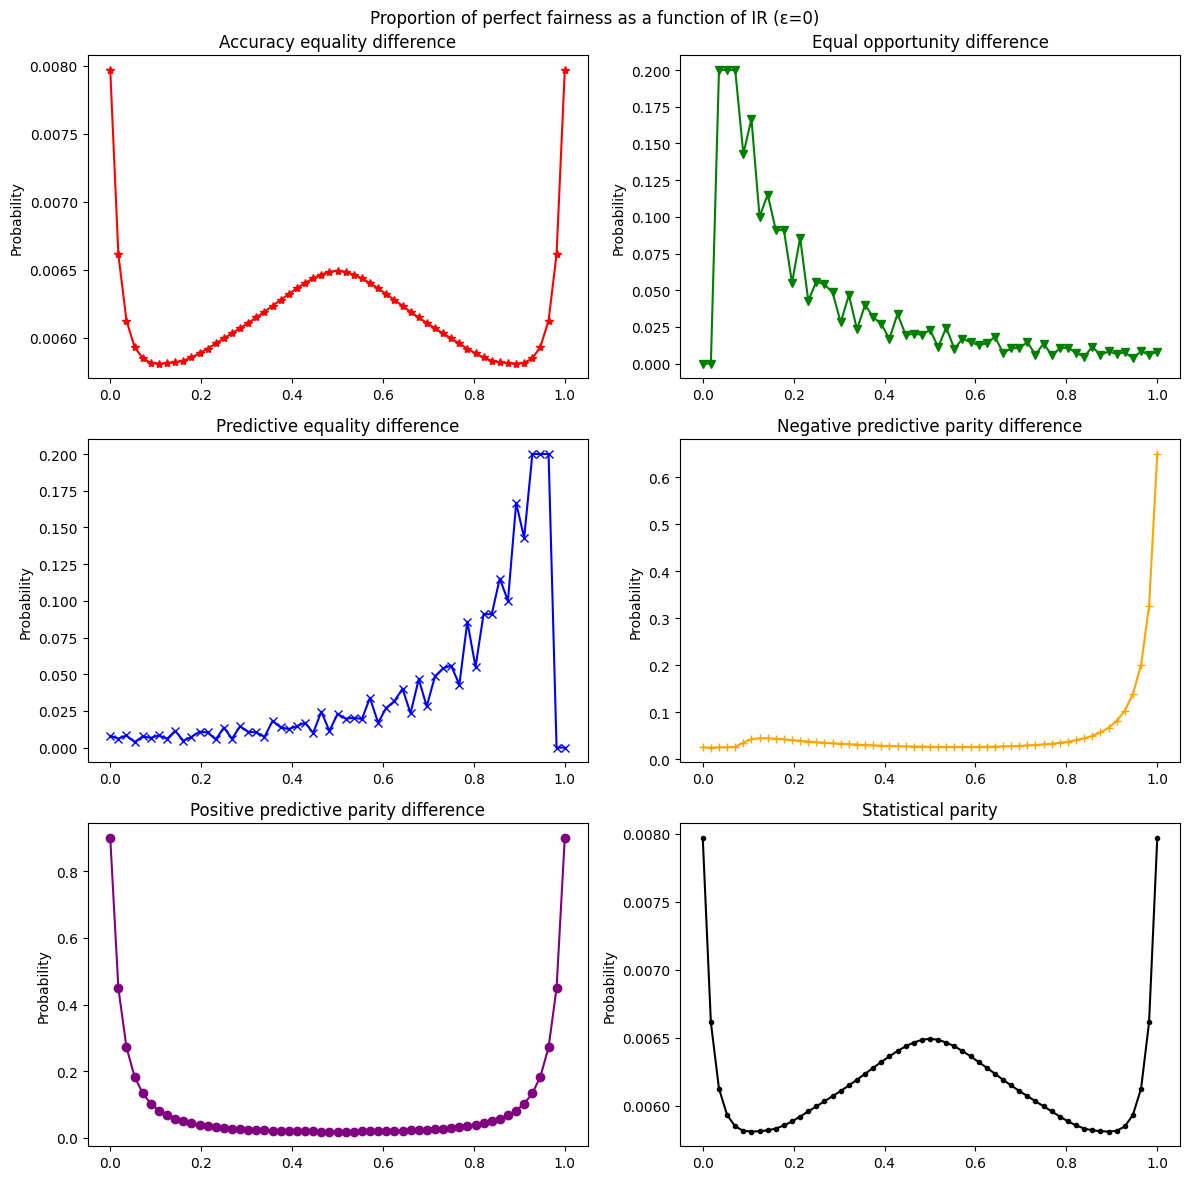

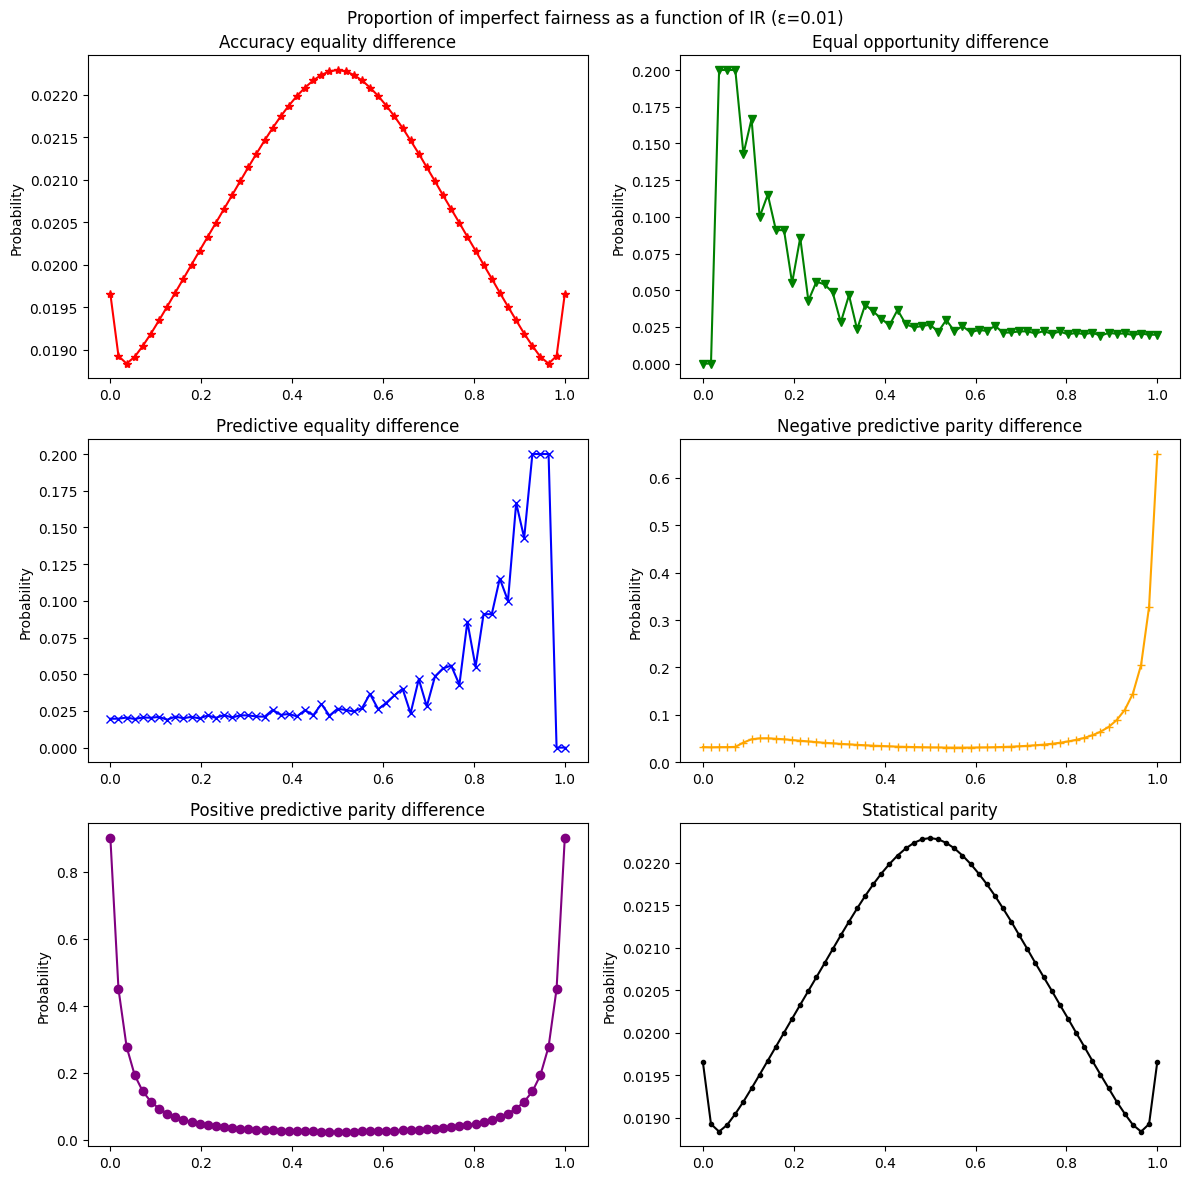

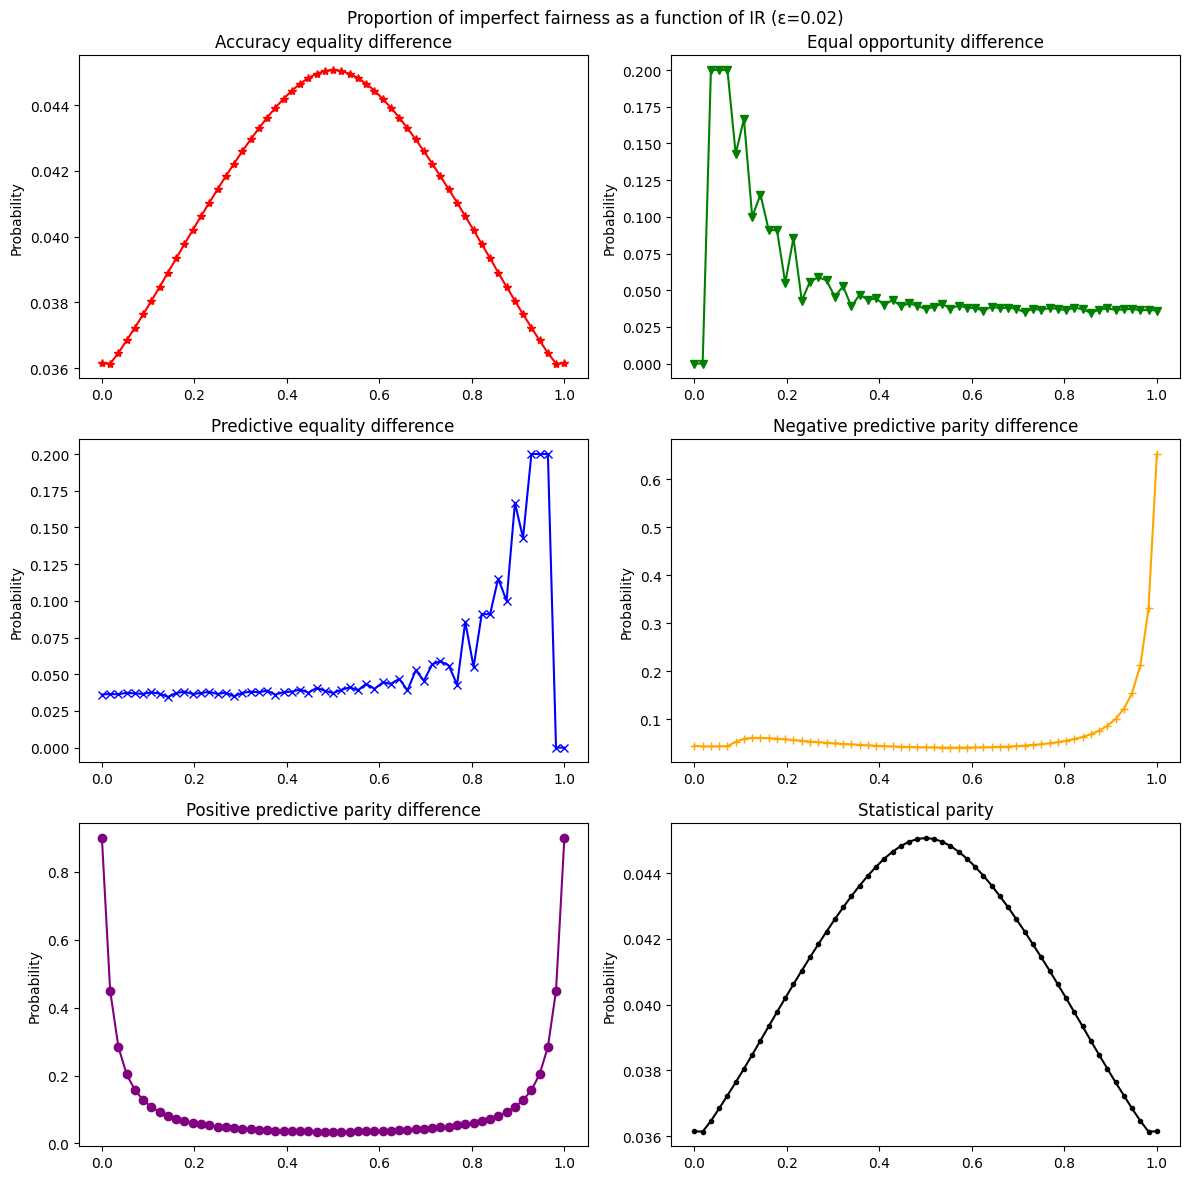

In [26]:
for ratio_type in ratio_types:
    for eps in epsilons:
        fig = separate_axis(dfs[(ratio_type, eps)], ratio_type, diff_metrics_styles,
                            eps=eps)
        fig.savefig(path.join(plots_dir, f'ppf_separated_{ratio_type}_eps{eps}.png'),
                    dpi=300)

## Imperfect perfection - results with epsilon (see the saved copy)

In [18]:
dfs = {}
epsilon = 0

for ratio in ['gr', 'ir']:
    dfs[ratio] = pd.read_csv(path.join(calculations_dir, f'ppf_{ratio}_eps{epsilon}.csv'))

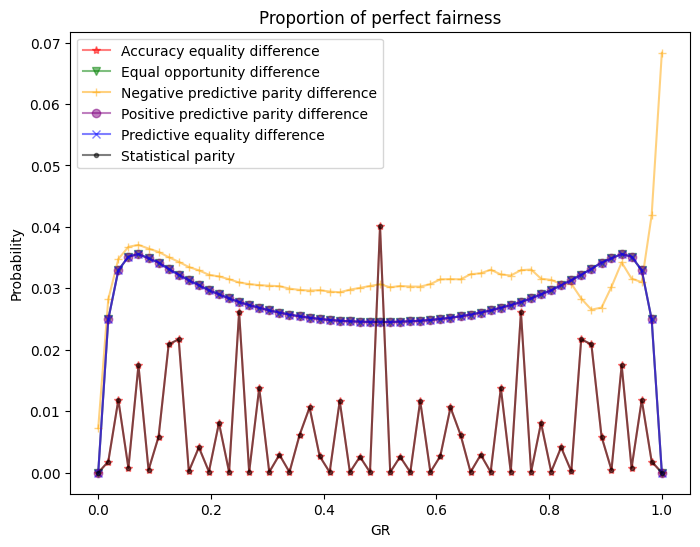

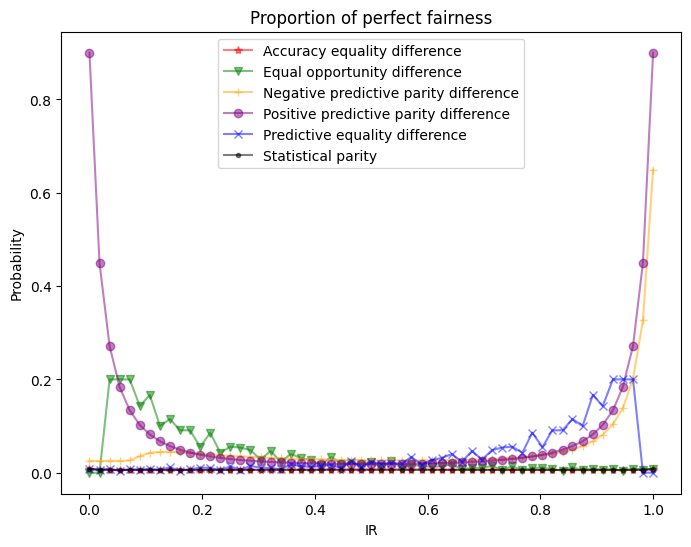

In [19]:
for ratio_type in ['gr', 'ir']:
    fig = plot_mlp(dfs[ratio_type].copy(), ratio_type, diff_metrics_styles)      # TODO why copy?
    fig.savefig(path.join(plots_dir, f'ppf_{ratio_type}_e{epsilon}_2.png'),
                dpi=300)

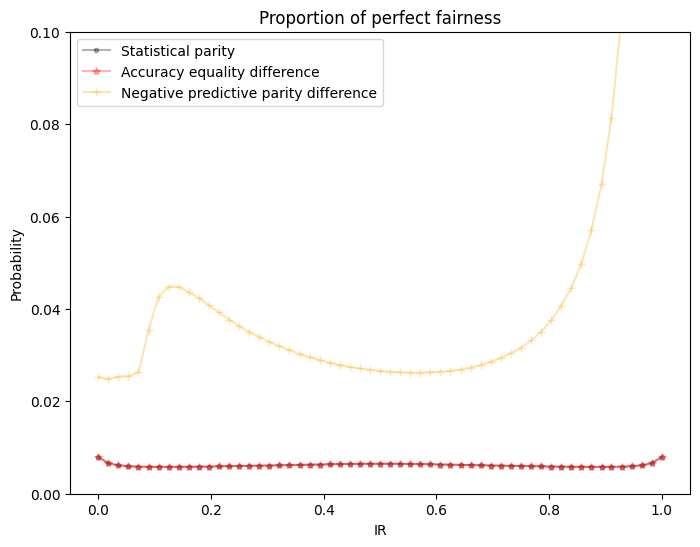

In [20]:
base_metric = 'ir'
df = dfs[base_metric]

fig, ax = plt.subplots(figsize=(8, 6))
for col in ['Statistical parity', 'Accuracy equality difference', 'Negative predictive parity difference']:
    ax.plot(df[base_metric], df[col], label=col,
            alpha=.3, **diff_metrics_styles[col])
ax.set_ylim(0, .1)
# ax.set_ylim(0, .01)
ax.set_xlabel(base_metric.upper())
ax.set_ylabel('Probability')
ax.set_title('Proportion of perfect fairness')
ax.legend()
plt.show()

# Ratio based metrics

In [36]:
dfs_ratio = {(ratio_type, eps): pd.read_csv(path.join(calculations_dir, f'ppf_{ratio_type}_ratios_eps{eps}.csv'))
             for ratio_type in ratio_types
             for eps in epsilons}

ratio_metrics_styles = {    # { file: metric name }
    'Accuracy equality ratio': {'color': 'green', 'marker': 'o'},
    'Disparate impact': {'color': 'red', 'marker': '*'},
    'Equal opportunity ratio': {'color': 'blue', 'marker': '.'},
    'Predictive equality ratio': {'color': 'orange', 'marker': 's'},
    'Positive predictive parity ratio': {'color': 'purple', 'marker': 'x'},
    'Negative predictive parity ratio': {'color': 'brown', 'marker': '^'},
}

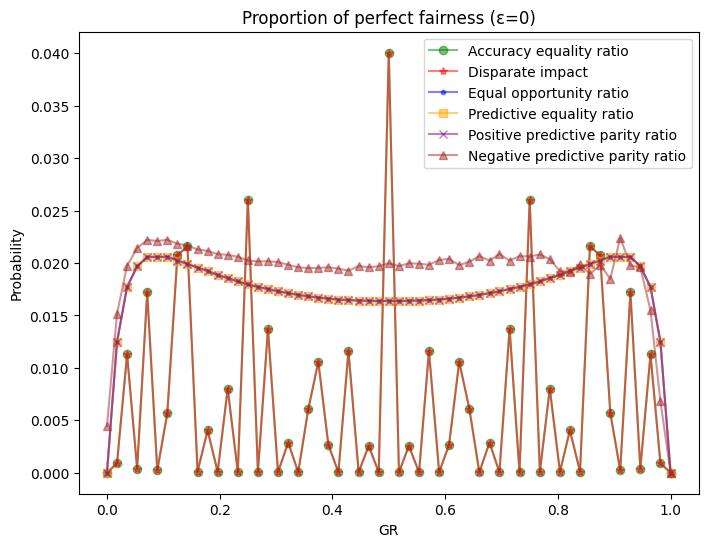

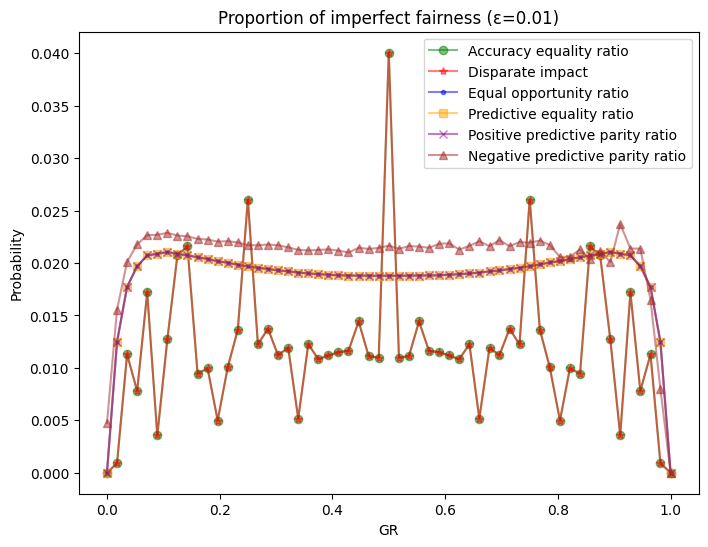

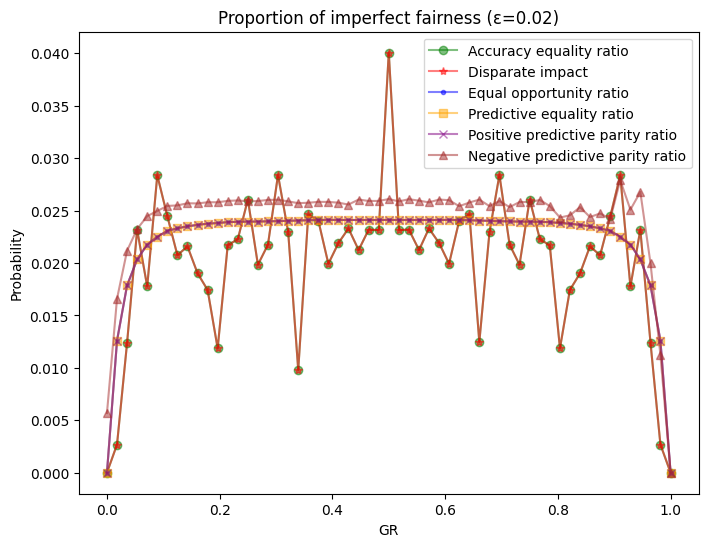

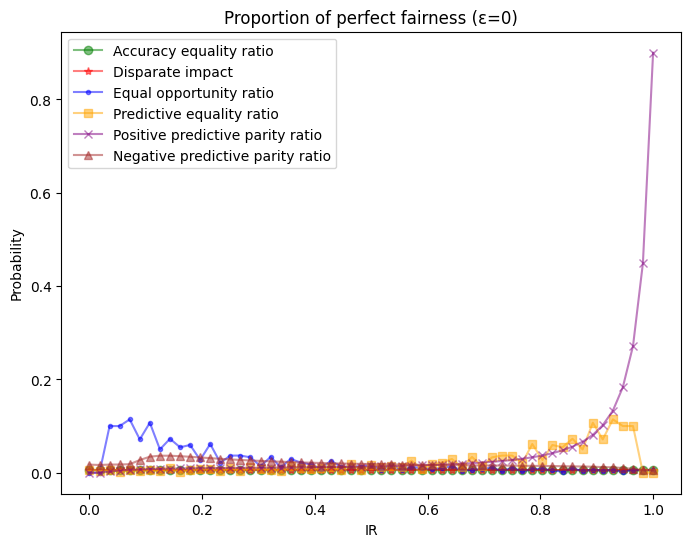

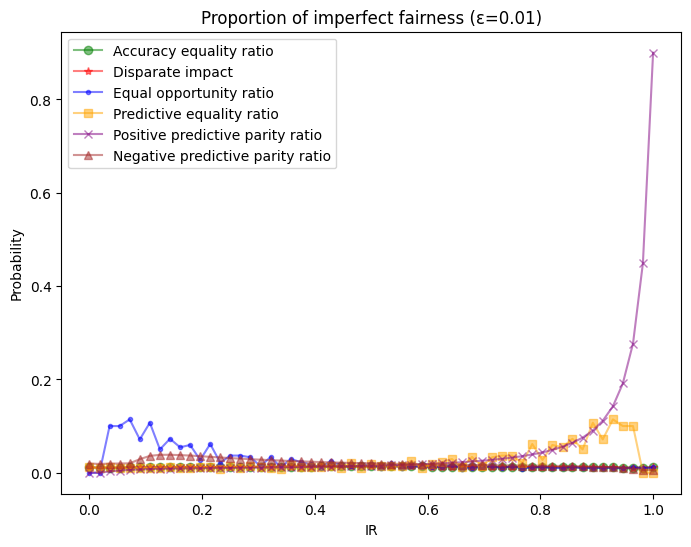

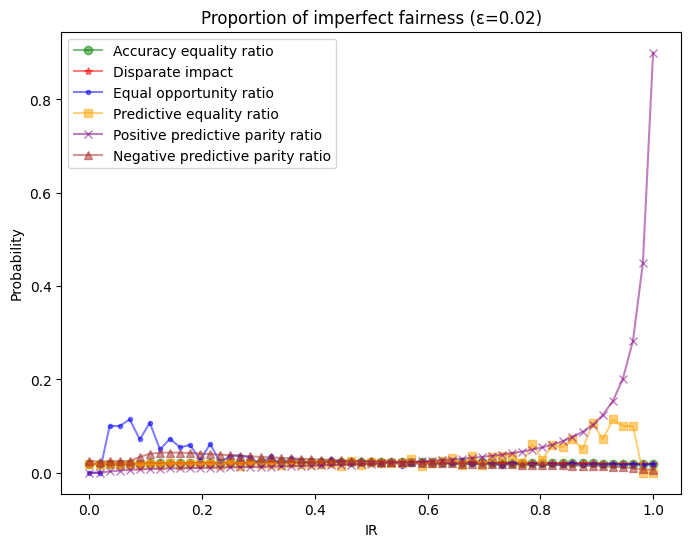

In [37]:
for ratio_type in ratio_types:
    for eps in epsilons:
        fig = plot_mlp(dfs_ratio[(ratio_type, eps)].copy(), ratio_type, ratio_metrics_styles,
                       title=f'Proportion of {"perfect" if eps == 0 else "imperfect"} fairness (ε={eps})')
        fig.savefig(path.join(plots_dir, f'ppf_ratio_basic_{ratio_type}_e{eps}.png'),
                    dpi=300)

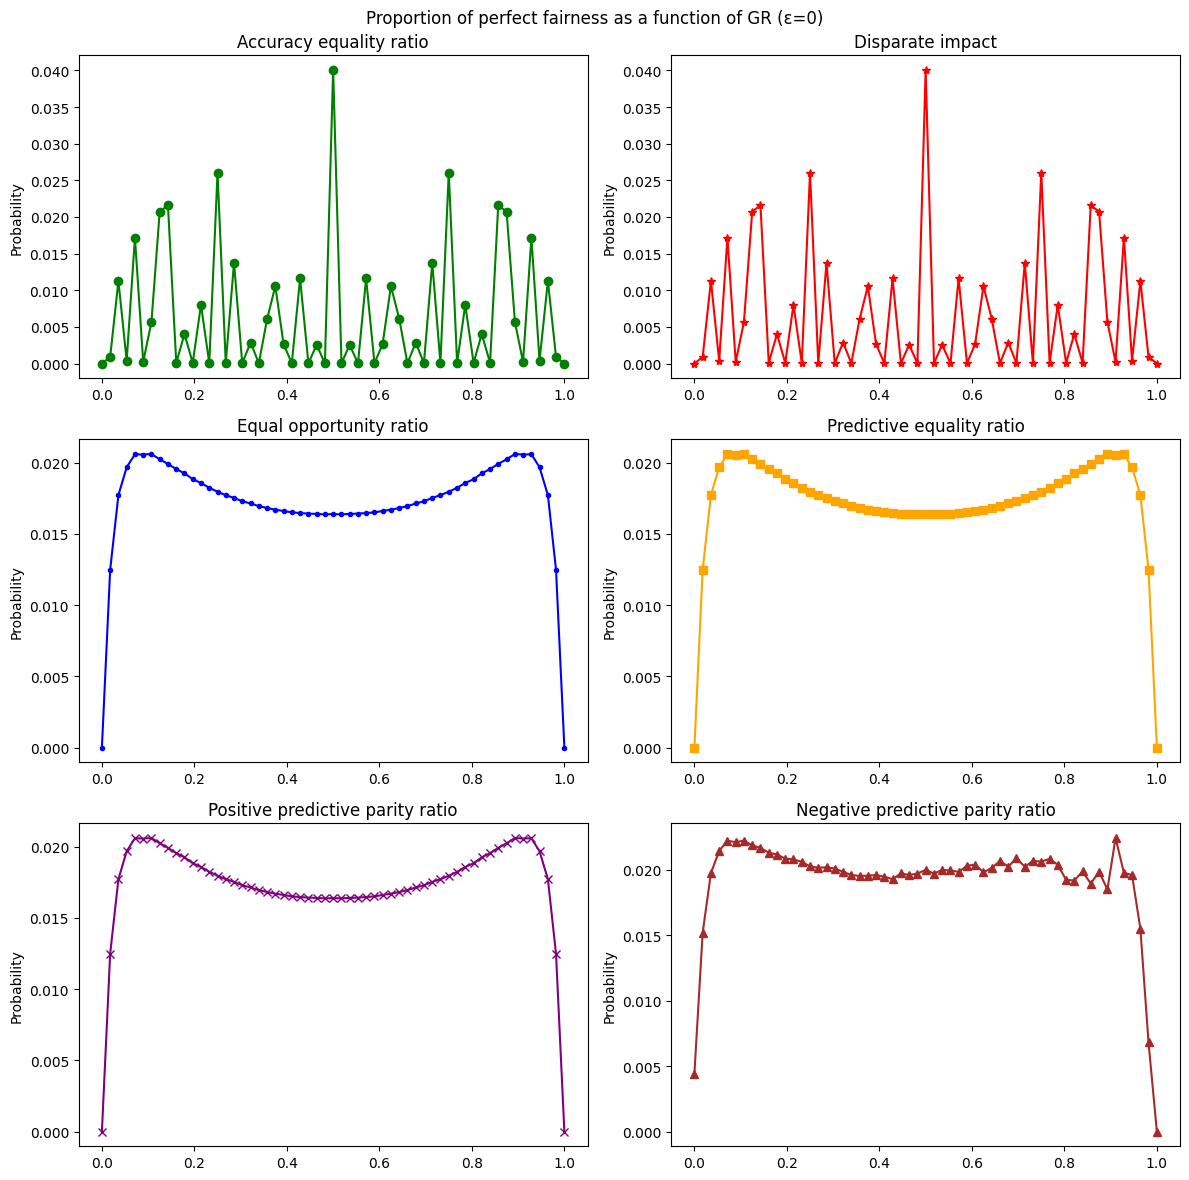

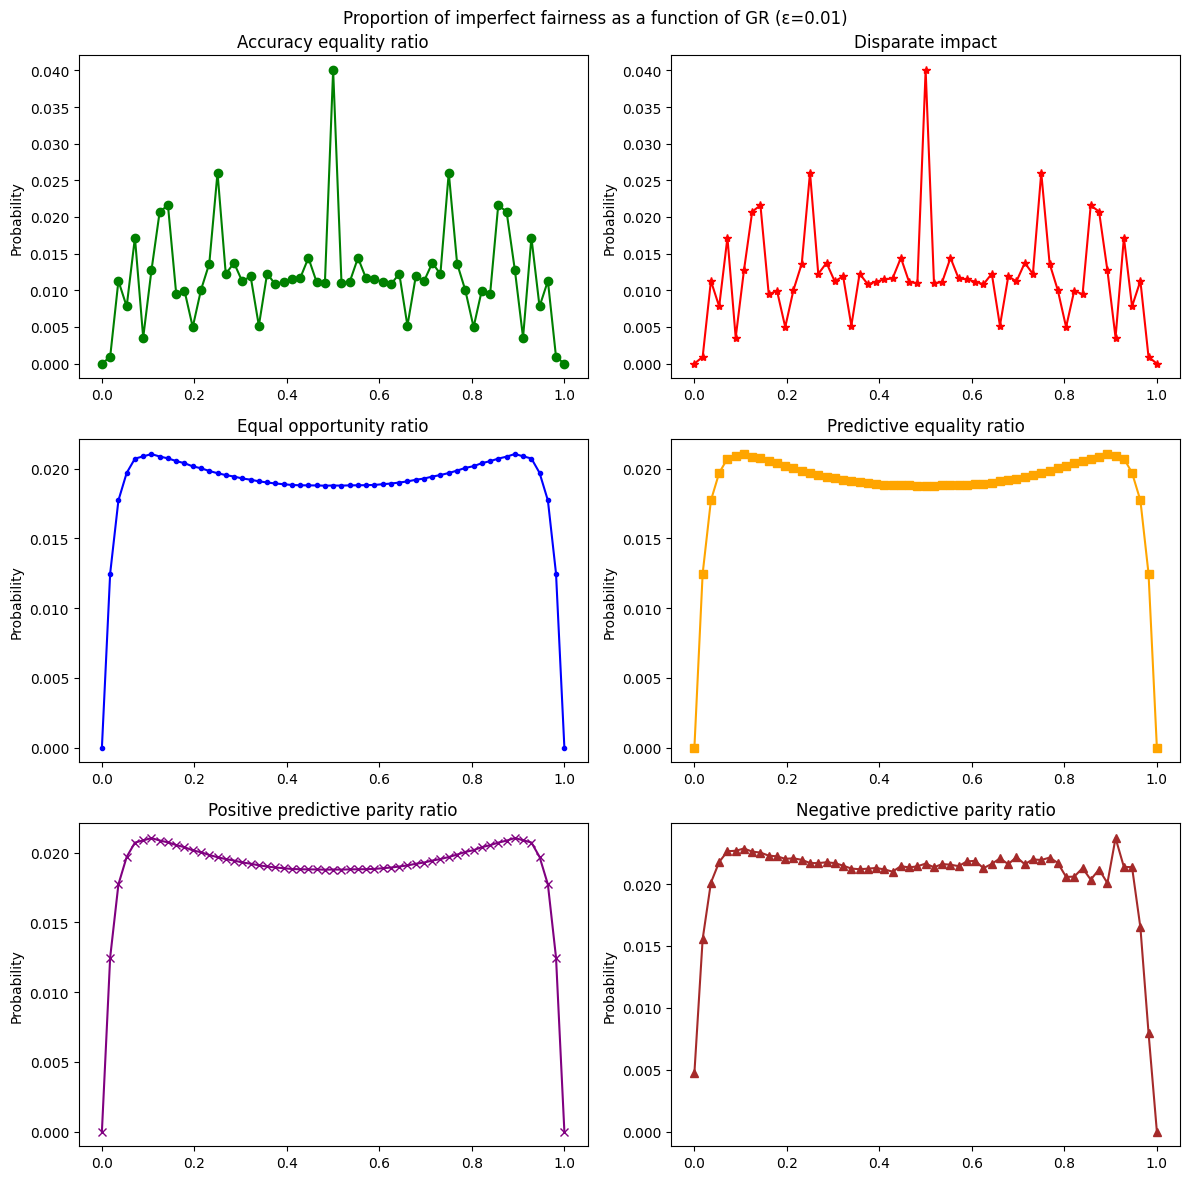

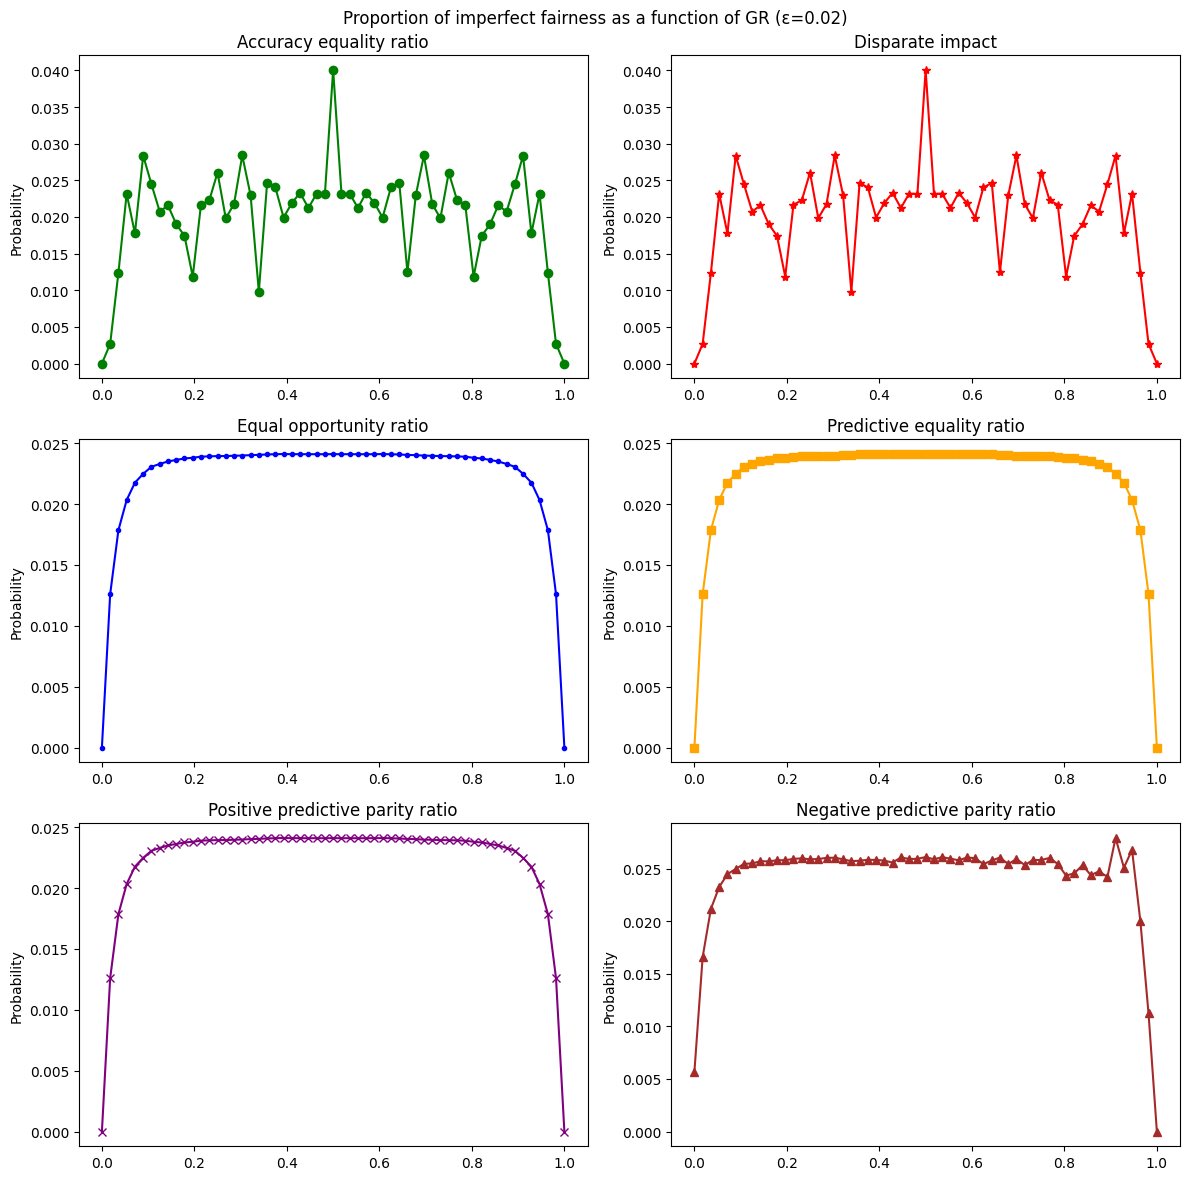

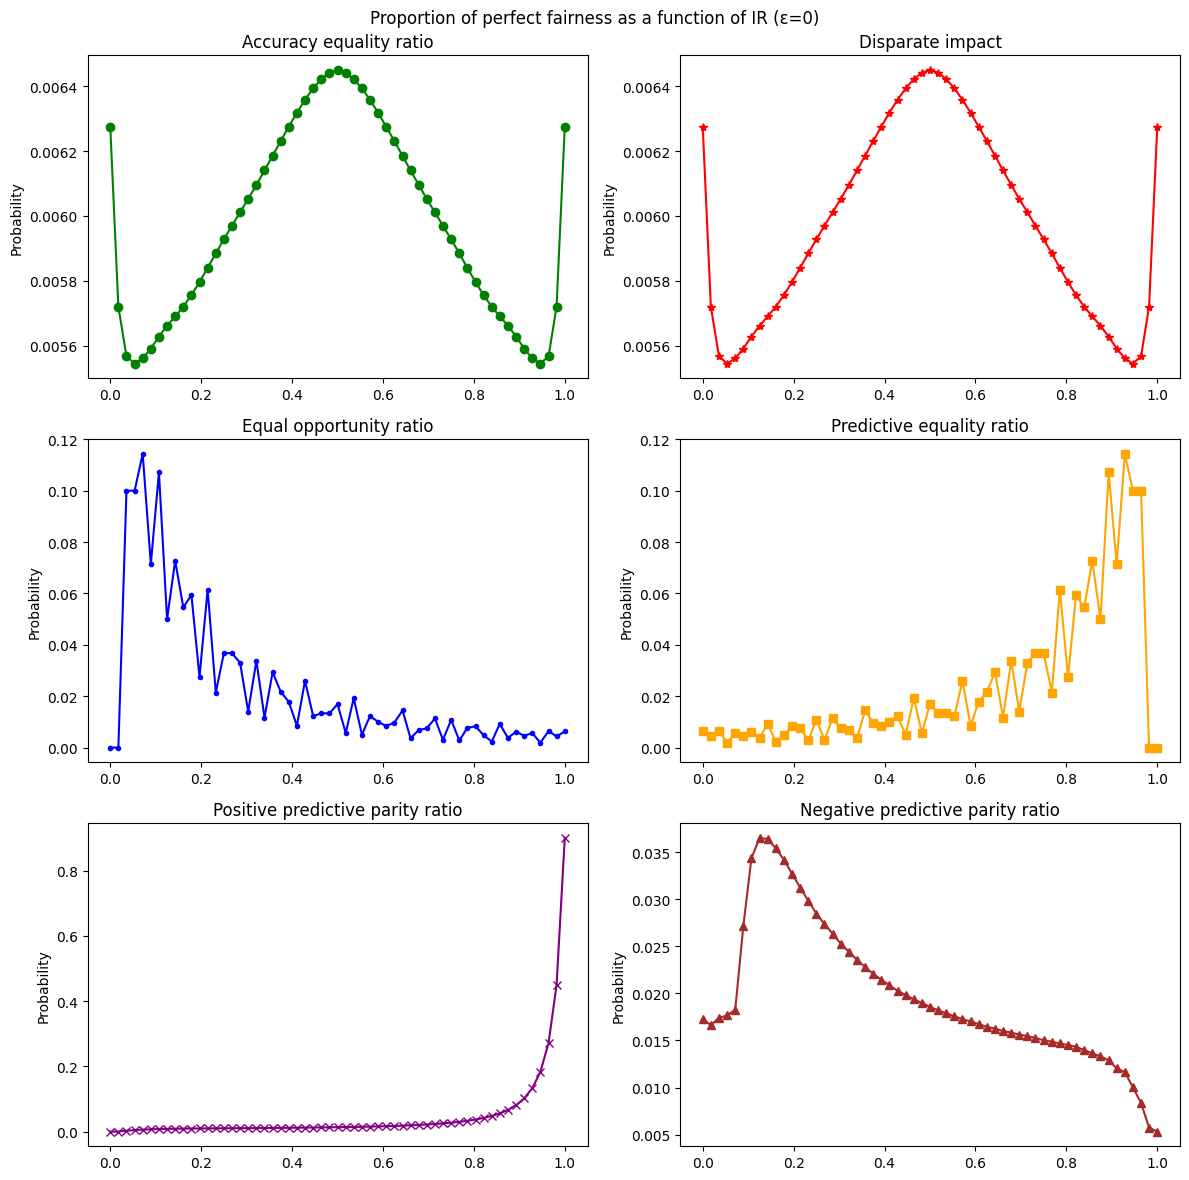

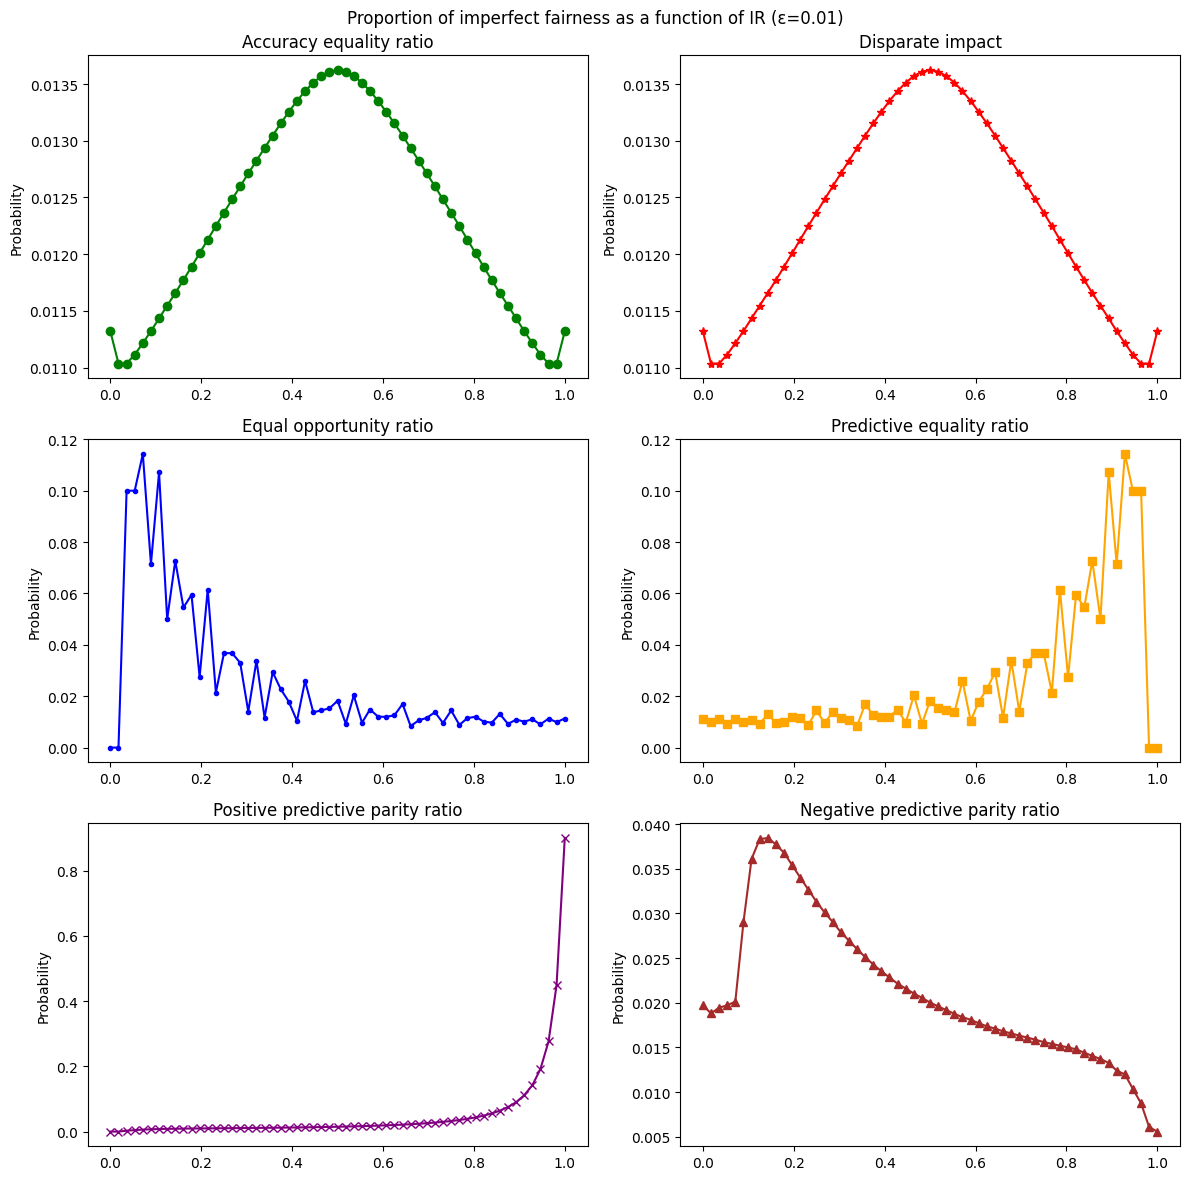

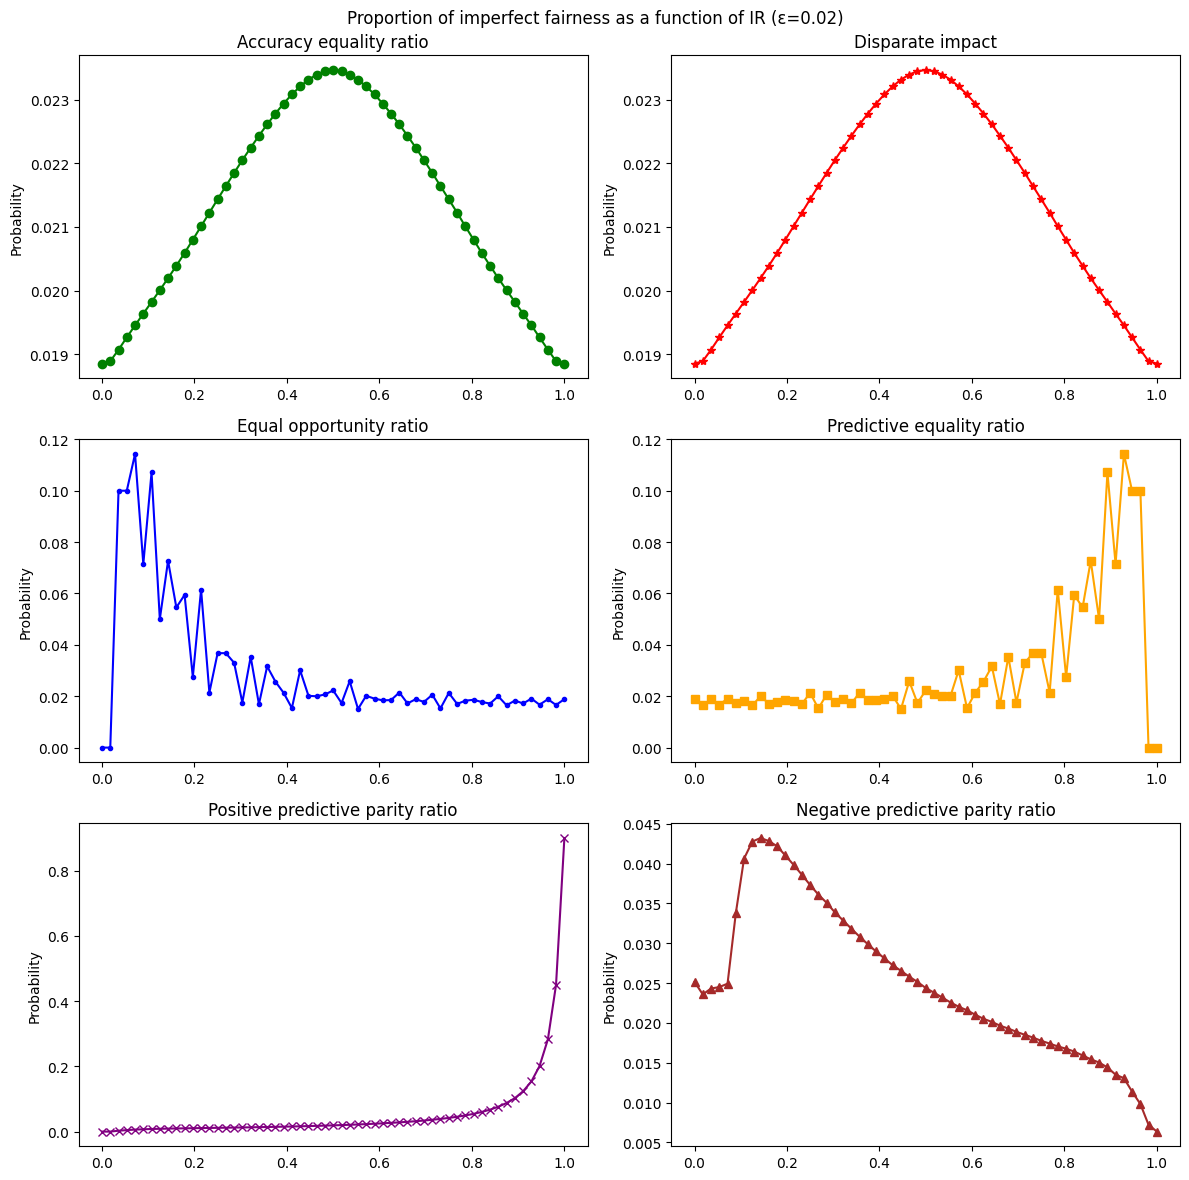

In [38]:
# separate axis - ratios
for ratio_type in ratio_types:
    for eps in epsilons:
        fig = separate_axis(dfs_ratio[(ratio_type, eps)], ratio_type, ratio_metrics_styles, eps=eps)
        fig.savefig(path.join(plots_dir, f'ppf_ratio_separated_{ratio_type}_eps{eps}.png'),
                    dpi=300)

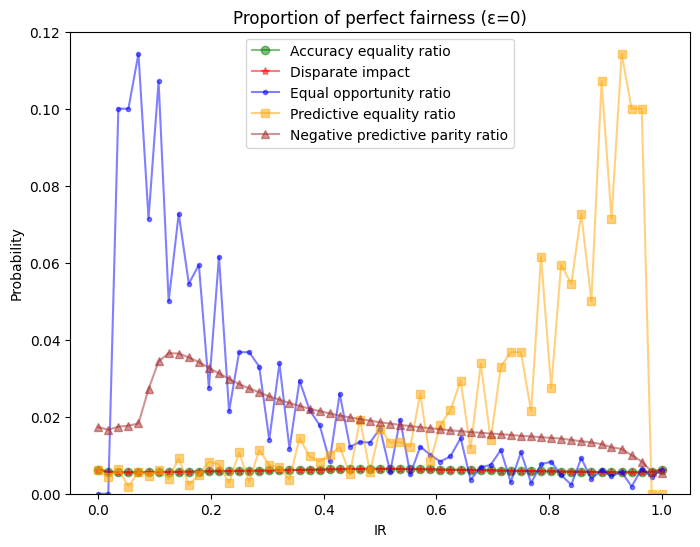

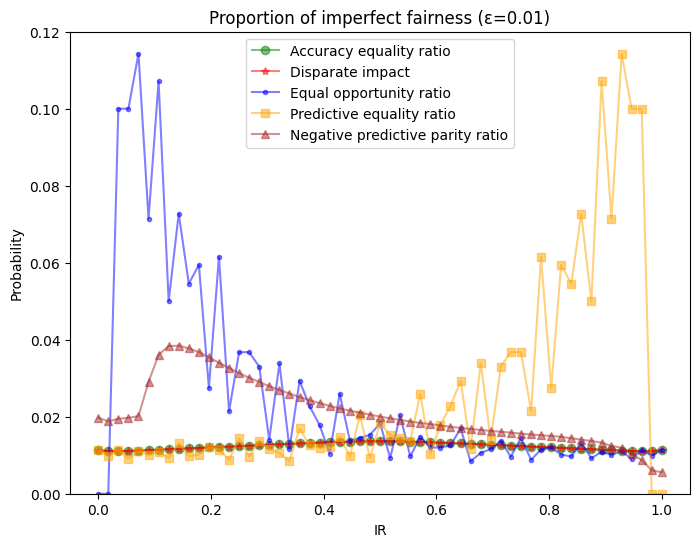

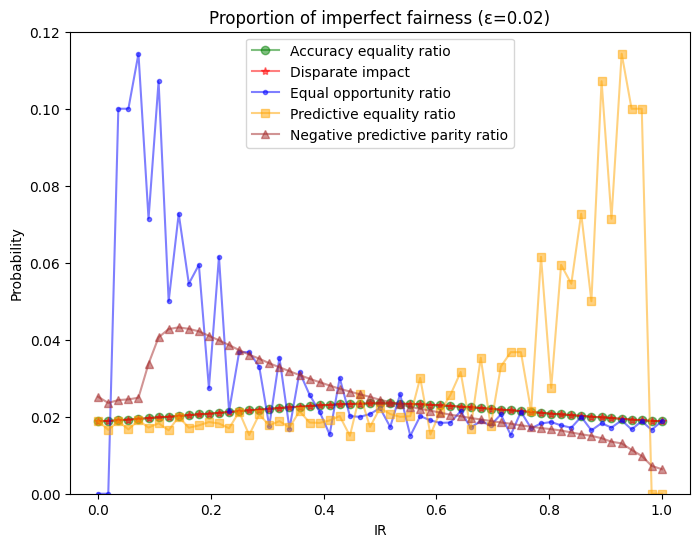

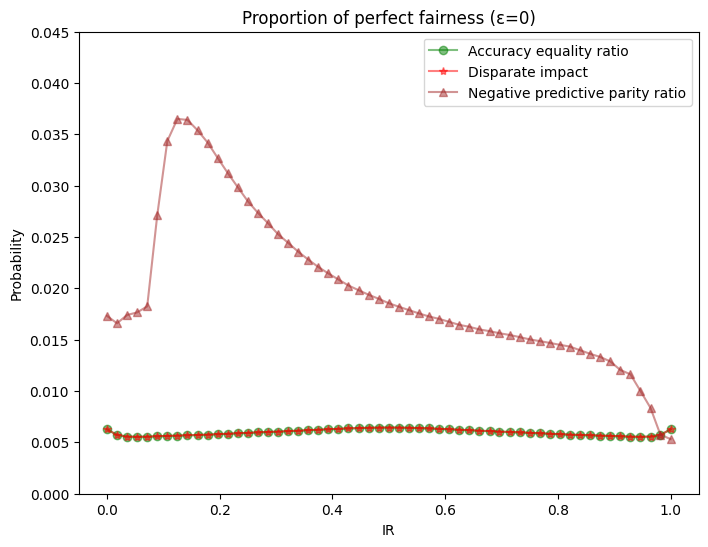

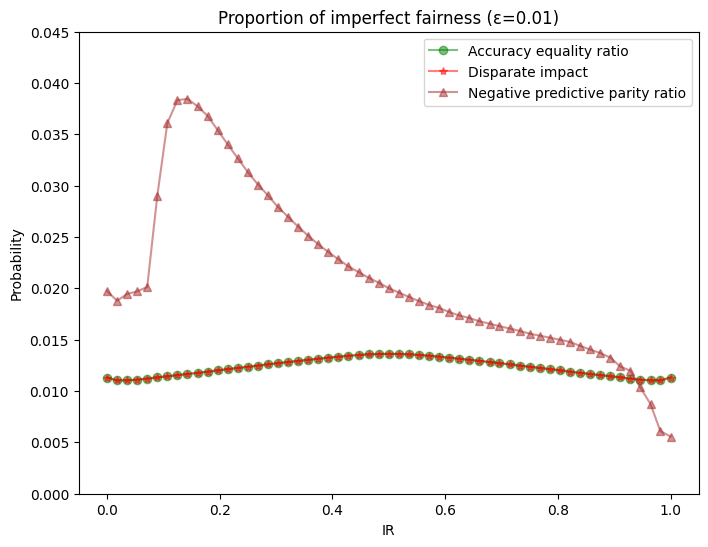

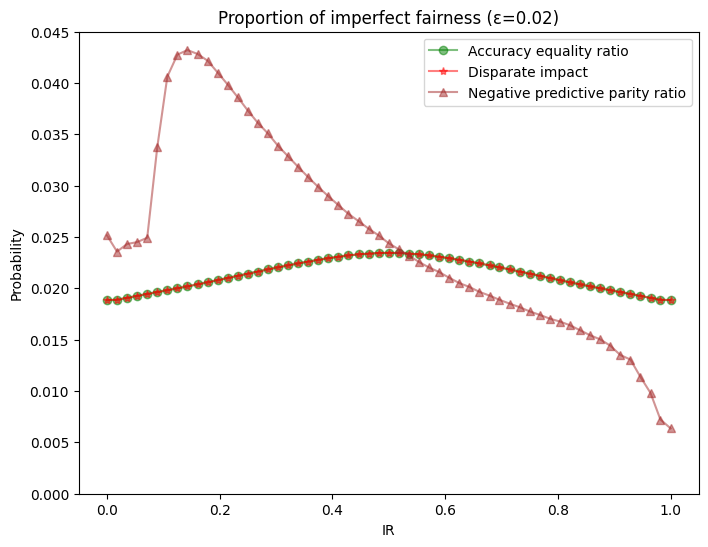

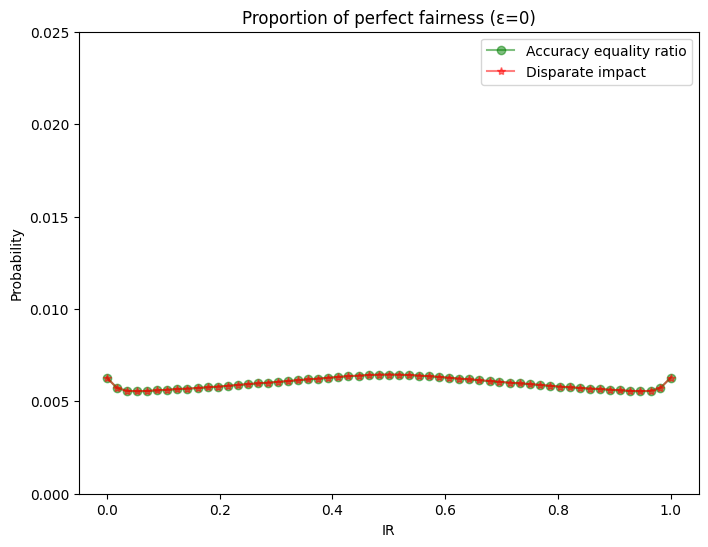

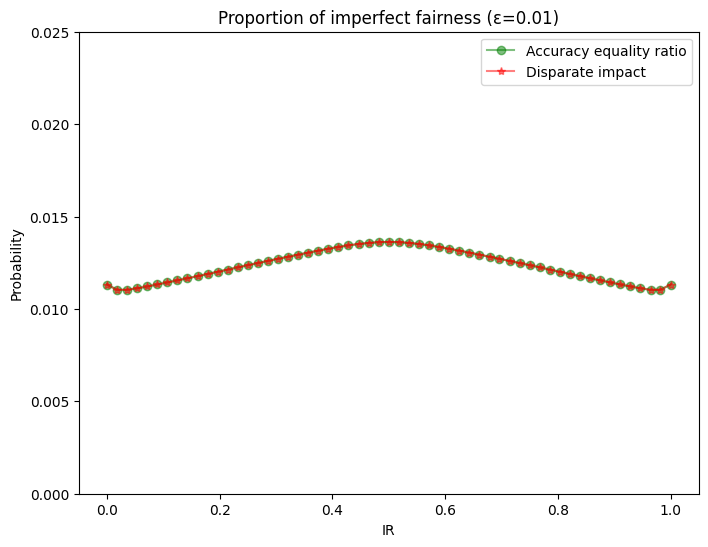

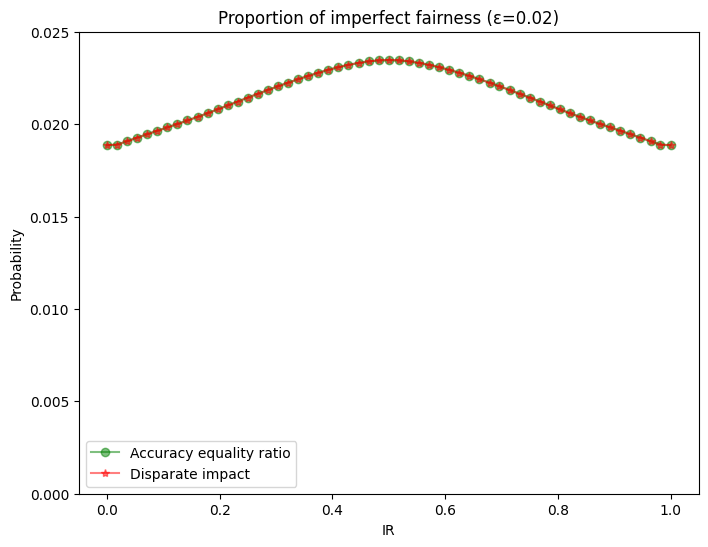

In [40]:
# close-ups for IR
ratio_type = 'ir'
selected_ratio_metrics = {
    'Accuracy equality ratio': {'color': 'green', 'marker': 'o'},
    'Disparate impact': {'color': 'red', 'marker': '*'},
    'Equal opportunity ratio': {'color': 'blue', 'marker': '.'},
    'Predictive equality ratio': {'color': 'orange', 'marker': 's'},
    # 'Positive predictive parity ratio': {'color': 'purple', 'marker': 'x'},
    'Negative predictive parity ratio': {'color': 'brown', 'marker': '^'},
}
remove = [
    [],
    ['Equal opportunity ratio', 'Predictive equality ratio'],
    ['Negative predictive parity ratio'],
]

for i, y_max in enumerate([.12, .045, .025]):
    for k in remove[i]:
        del selected_ratio_metrics[k]

    for eps in epsilons:
        fig = plot_mlp(dfs_ratio[(ratio_type, eps)].copy(), ratio_type, selected_ratio_metrics,
                       title=f'Proportion of {"perfect" if eps == 0 else "imperfect"} fairness (ε={eps})',
                       y_max=y_max)
        fig.savefig(path.join(plots_dir, f'ppf_ratio_scaled_{ratio_type}_e{eps}_y{y_max}.png'),
                    dpi=300)